# Neutrino event classification

This mini-project's dataset is comprised of a number of small files containing images of simulated neutrino interactions in a hypothetical detector that looks an awful lot like the detectors of the NOvA experiment. For each neutrino interaction the images consist of two $100 \times 80$ pixel images that represent the $x \times z$ and $y \times z$ projections of the tracks of particles in the detector.

The data for this mini-project comes in the form of the following files:

| File | Description |
| ----------- | ----------- |
| neutrino1.h5 | The 1st HDF5 file containing event images and meta deta |
| $\vdots$ | The middle ones |
| neutrino200.h5| The 200th HDF5 file|


The images show the energy deposited by simulated neutrinos in a NOvA like detector. Some of the meta information in the hdf5 file is described below

| Label | Description |
| ----------- | ----------- |
| neutrino/nuenergy | Neutrino Energy (GeV) |
| neutrino/lepenergy | Lepton Energy (GeV) |
| neutrino/finalstate | Interaction |
| neutrino/finalstate | Final State |
 

The [PDG code](https://pdg.lbl.gov/2019/reviews/rpp2019-rev-monte-carlo-numbering.pdf) is a number which identifies the particle type (e.g electron=11, electron-neutrino=12, etc.)

The $interaction$ says what kind of interaction occured and is defined in the enumeration below.

## Machine learning tasks
1. Develop a machine learning classifier that can successfully identify $\nu_\mu$ charged-current events
2. Test your machine learning classifier and investigate how the efficiency of the classifier depends on the meta data variables shown above

### Potential extensions
1. Write a machine learning algorithm to determine the energy of the neutrino
2. Write a machine learning algorithm to determine the flavour of the neutrino
3. Write a machine learning algorithm to determine $y=$ lepton energy over neutrino energy
4. Write a machine learning algorithm to determine the number of protons or pions
5. Write a machine learning algorithm to determine the interaction mode.




In [1]:
import enum 
class Interaction(enum.Enum):
    kNumuQE =0           # Numu CC QE interaction
    kNumuRes =1           # Numu CC Resonant interaction
    kNumuDIS = 2          # Numu CC DIS interaction
    kNumuOther = 3        # Numu CC, other than above
    kNueQE = 4            # Nue CC QE interaction
    kNueRes = 5           # Nue CC Resonant interaction
    kNueDIS = 6           # Nue CC DIS interaction
    kNueOther = 7         # Nue CC, other than above
    kNutauQE = 8          # Nutau CC QE interaction
    kNutauRes = 9         # Nutau CC Resonant interaction
    kNutauDIS =10         # Nutau CC DIS interaction
    kNutauOther =11       # Nutau CC, other than above
    kNuElectronElastic = 12# NC Nu On E Scattering
    kNC =13                # NC interaction
    kCosmic =14           # Cosmic ray background
    kOther =15            # Something else.  Tau?  Hopefully we don't use this
    kNIntType=16          # Number of interaction types, used like a vector size

    
class FinalState(enum.Enum):
    kNumu0tr0sh=0          # Numu CC - no track no shower
    kNumu0tr1sh=1          # Numu CC - no track  1 shower
    kNumu0tr2sh=enum.auto()          # Numu CC - no track  2 shower
    kNumu0trMsh=enum.auto()          # Numu CC - no track 3+ shower
    kNumu1tr0sh=enum.auto()          # Numu CC -  1 track no shower
    kNumu1tr1sh=enum.auto()          # Numu CC -  1 track  1 shower
    kNumu1tr2sh=enum.auto()          # Numu CC -  1 track  2 shower
    kNumu1trMsh=enum.auto()          # Numu CC -  1 track 3+ shower
    kNumu2tr0sh=enum.auto()          # Numu CC -  2 track no shower
    kNumu2tr1sh=enum.auto()          # Numu CC -  2 track  1 shower
    kNumu2tr2sh=enum.auto()          # Numu CC -  2 track  2 shower
    kNumu2trMsh=enum.auto()          # Numu CC -  2 track 3+ shower
    kNumuMtr0sh=enum.auto()          # Numu CC - 3+ track no showe
    kNumuMtr1sh=enum.auto()          # Numu CC - 3+ track  1 shower
    kNumuMtr2sh=enum.auto()          # Numu CC - 3+ track  2 showe
    kNumuMtrMsh=enum.auto()          # Numu CC - 3+ track 3+ shower
    kNue0tr0sh=enum.auto()           # Nue CC - no track no shower
    kNue0tr1sh=enum.auto()           # Nue CC - no track  1 shower
    kNue0tr2sh=enum.auto()           # Nue CC - no track  2 showe
    kNue0trMsh=enum.auto()           # Nue CC - no track 3+ shower
    kNue1tr0sh=enum.auto()           # Nue CC -  1 track no shower
    kNue1tr1sh=enum.auto()           # Nue CC -  1 track  1 shower
    kNue1tr2sh=enum.auto()           # Nue CC -  1 track  2 shower
    kNue1trMsh=enum.auto()           # Nue CC -  1 track 3+ shower
    kNue2tr0sh=enum.auto()           # Nue CC -  2 track no shower
    kNue2tr1sh=enum.auto()           # Nue CC -  2 track  1 shower
    kNue2tr2sh=enum.auto()           # Nue CC -  2 track  2 shower
    kNue2trMsh=enum.auto()           # Nue CC -  2 track 3+ shower
    kNueMtr0sh=enum.auto()           # Nue CC - 3+ track no shower
    kNueMtr1sh=enum.auto()           # Nue CC - 3+ track  1 shower
    kNueMtr2sh=enum.auto()           # Nue CC - 3+ track  2 shower
    kNueMtrMsh=enum.auto()           # Nue CC - 3+ track 3+ shower
    kNC0tr0sh=enum.auto()           # NC CC - no track no shower
    kNC0tr1sh=enum.auto()           # NC CC - no track  1 shower
    kNC0tr2sh=enum.auto()           # NC CC - no track  2 shower
    kNC0trMsh=enum.auto()           # NC CC - no track 3+ shower
    kNC1tr0sh=enum.auto()           # NC CC -  1 track no shower
    kNC1tr1sh=enum.auto()           # NC CC -  1 track  1 shower
    kNC1tr2sh=enum.auto()           # NC CC -  1 track  2 shower
    kNC1trMsh=enum.auto()           # NC CC -  1 track 3+ shower
    kNC2tr0sh=enum.auto()           # NC CC -  2 track no shower
    kNC2tr1sh=enum.auto()           # NC CC -  2 track  1 shower
    kNC2tr2sh=enum.auto()           # NC CC -  2 track  2 shower
    kNC2trMsh=enum.auto()           # NC CC -  2 track 3+ shower
    kNCMtr0sh=enum.auto()           # NC CC - 3+ track no shower
    kNCMtr1sh=enum.auto()           # NC CC - 3+ track  1 shower
    kNCMtr2sh=enum.auto()           # NC CC - 3+ track  2 shower
    kNCMtrMsh=enum.auto()           # NC CC - 3+ track 3+ shower
    kCosmicFS=enum.auto()           # Cosmic ray background
    kOtherFS=enum.auto()            # Something else.  Tau?  Hopefully we don't use this
    kNFStType=enum.auto()            # Number of interaction types, used like a vector size



Student Number: 20127425

# Notebook Contents

### 1. Constructing a Machine Learning Model for Binary Classification for Muon-Neutrino Charged Current Events
- Binary Classifier
- Model Architecture & Training

### 2. Testing the Classifier and its Dependence on Metadata
- Simple Model Testing
- Testing Classifier's Energy Dependence
- Testing Classifier's Dependence on Type of Interaction

### 3. Extention 1: Training a Machine Learning Algorithm to Predict Neutrino Energies

### 4. Extention 2: Write a Machine Learning Algorithm to Determine the Interaction Mode

### 5. Conclusion

### Summary
In this notebook, we explore the construction of a binary classification model for identifying muon-neutrino charged current events. The notebook encompasses the process of normalization, the architecture of the binary classifier, its training, and subsequent testing on given metadata. We also attempt to train a machine learning model to predict neutrino energies given images of their interactions.

# 1. Constructing a machine learning model for binary classification for muon-neutrino charged current events

First we have to access the data as well as format it and normalise it. But to do so we have to explore what method of normalisation would be most appropriate. Before this we have to load in the data.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.utils as utils
import math
import random

# TensorFlow and tf.keras
import tensorflow as tf
import keras
import keras.layers
import keras.datasets.mnist
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers
import pandas as pd

import matplotlib.style 
import matplotlib as mpl 
# import the urllib library
import urllib.request
import h5py

from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sbrn

mpl.rcParams['figure.dpi']=100 # dots per inch

C:\Users\Felix\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Copy a network object to a local file
urllib.request.urlretrieve('http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/nova/neutrino1.h5', "neutrino10.h5")

#Open the local h5 file with h5py
df=h5py.File('neutrino1.h5','r')

# display all metadata
pd.DataFrame(df['neutrino'])

,0
0,cycle
1,evt
2,finalstate
3,finalstateprong
4,interaction
5,lepenergy
6,nuenergy
7,parent
8,particles
9,rec.training.trainingdata_idx


Throughout this notebook we will focus mostly on interaction, lepenergy and nuenergy.

In [4]:
file_num_cap = 112 # upper cap on how far to go to add file
data_files = {} # initialise data file dictionary

# loop over given number of files
for i in range(100,file_num_cap):
    # Copy a network object to a local file
    urllib.request.urlretrieve(f'http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/nova/neutrino{i}.h5', 
                               f'neutrino{i}h5')
    
    # Open and store the file in data file dictionary
    data_files[i] = h5py.File(f'neutrino{i}h5','r')

Below are plots of the muon-neutrino interactions.

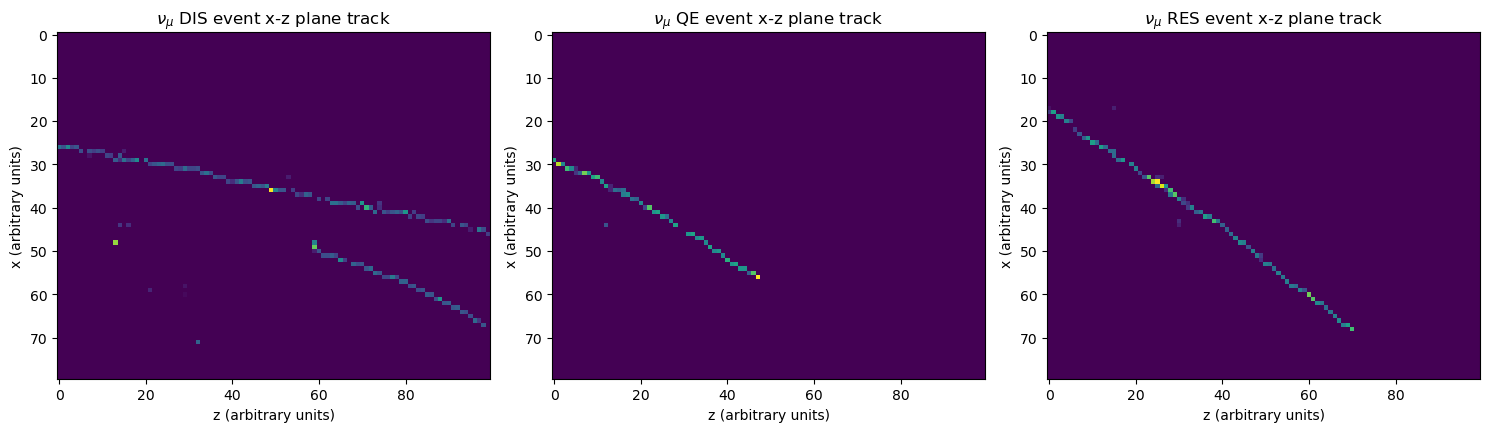

In [5]:
# load data of specific events
dis_img = data_files[100]['cvnmap'][1].reshape((2,100,80))
qe_img = data_files[100]['cvnmap'][2].reshape((2,100,80))
res_img = data_files[100]['cvnmap'][5].reshape((2,100,80))

#plot types of interactions
fig, ax = plt.subplots(1 , 3, figsize=(15, 10)) 

# Plot DIS event
ax[0].imshow(dis_img[0].T)
ax[0].set_title('$\\nu_{\\mu}$ DIS event x-z plane track')
ax[0].set_xlabel('z (arbitrary units)')
ax[0].set_ylabel('x (arbitrary units)')

# Plot QE event
ax[1].imshow(qe_img[0].T)
ax[1].set_title('$\\nu_{\\mu}$ QE event x-z plane track')
ax[1].set_xlabel('z (arbitrary units)')
ax[1].set_ylabel('x (arbitrary units)')

# Plot RES event
ax[2].imshow(res_img[0].T)
ax[2].set_title('$\\nu_{\\mu}$ RES event x-z plane track')
ax[2].set_xlabel('z (arbitrary units)')
ax[2].set_ylabel('x (arbitrary units)')

plt.tight_layout()

We can see that DIS interactions are less clean than QE or Res, which are nice smooth tracks. Below are plots of non-muon-neutrino interactions.

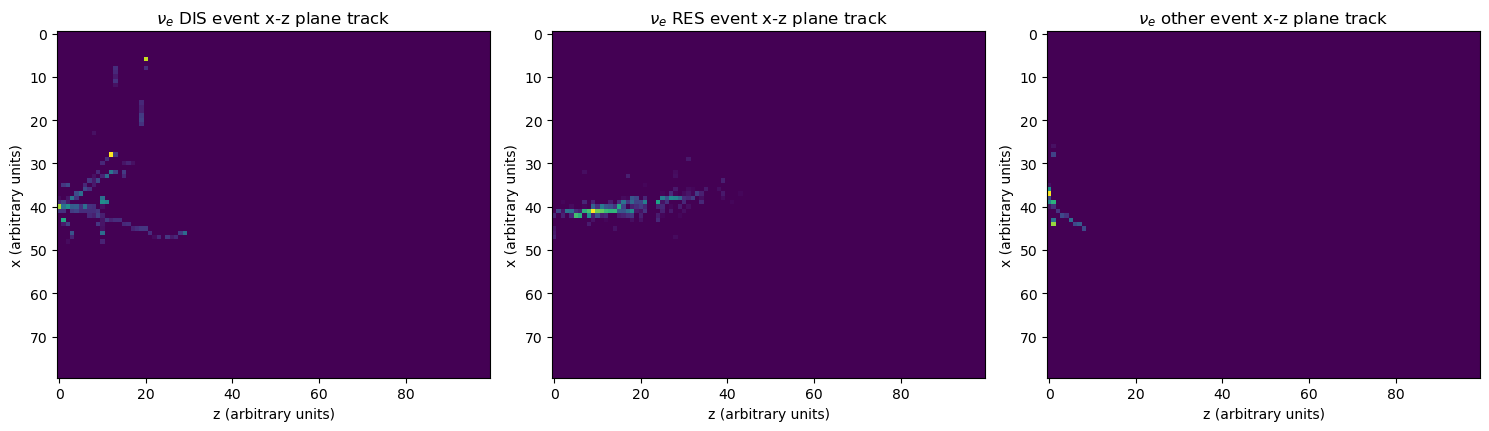

In [6]:
# load data of specific events
NueDis_img = data_files[102]['cvnmap'][132].reshape((2,100,80))
qe_img = data_files[102]['cvnmap'][43].reshape((2,100,80))
res_img = data_files[100]['cvnmap'][588].reshape((2,100,80))

#plot types of interactions
fig, ax = plt.subplots(1 , 3, figsize=(15, 10)) 

# Plot electron-neutrino DIS event
ax[0].imshow(NueDis_img[0].T)
ax[0].set_title(r"$\nu_{e}$"+' DIS event x-z plane track')
ax[0].set_xlabel('z (arbitrary units)')
ax[0].set_ylabel('x (arbitrary units)')

# Plot electron-neutrino Res event
ax[1].imshow(qe_img[0].T)
ax[1].set_title(r"$\nu_{e}$"+' RES event x-z plane track')
ax[1].set_xlabel('z (arbitrary units)')
ax[1].set_ylabel('x (arbitrary units)')

# Plot electron-neutrino other event
ax[2].imshow(res_img[0].T)
ax[2].set_title(r"$\nu_{e}$"+' other event x-z plane track')
ax[2].set_xlabel('z (arbitrary units)')
ax[2].set_ylabel('x (arbitrary units)')

plt.tight_layout()

Below I plot a muon-neutrino event from both points of view available.

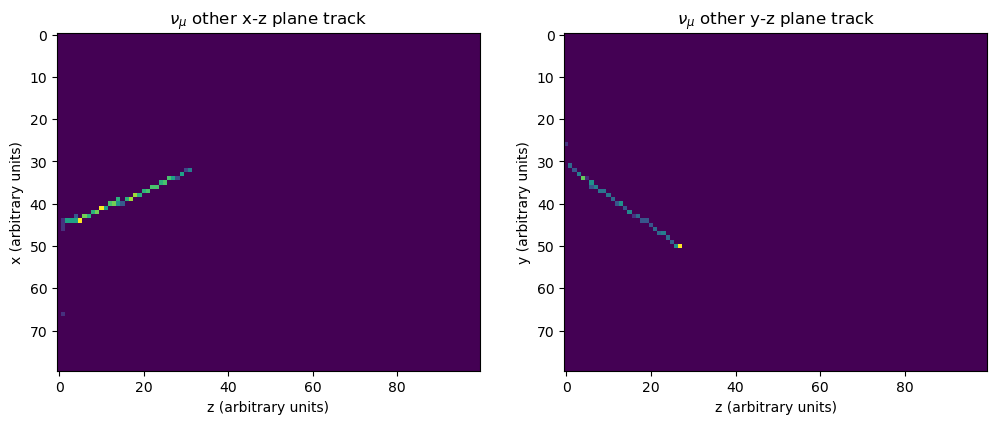

In [7]:
# Reshape the image data
img = np.array(data_files[100]['cvnmap'][0]).reshape((2,100,80))

# Plot both interaction types with increased plot size and titles
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
ax[0].imshow(img[0].T)
ax[0].set_title(r"$\nu_{\mu}$"+' other x-z plane track')
ax[0].set_xlabel('z (arbitrary units)')
ax[0].set_ylabel('x (arbitrary units)')

ax[1].imshow(img[1].T)
ax[1].set_title(r"$\nu_{\mu}$"+' other y-z plane track')
ax[1].set_xlabel('z (arbitrary units)')
ax[1].set_ylabel('y (arbitrary units)')

plt.show()

The binary classifier will be designed as such to take in both perspectives for each input.

## Normalisation 

There are two main methods we could normalise our images. One would be to divide each image by its maximum pixel value (individual normalisation), and another would be to divide all images by the maximum value of all pixel values included in the whole dataset (batch normalisation).

In [8]:
# normal images
img = np.array(data_files[100]['cvnmap'])
in_img = img.reshape((img.shape[0],2,100,80)).transpose(0,1,3,2)

# batch normalised images
normalised_event1 = np.array(data_files[100]['cvnmap'], dtype='float64')
normalised_event1 /= normalised_event1.max()
normalised_event1 = normalised_event1.reshape((normalised_event1.shape[0],2,100,80)).transpose(0,1,3,2)

# individually normalised images
normalised_event2 = np.array(data_files[100]['cvnmap'], dtype='float64')
normalised_event2 /= normalised_event2.max(axis=1)[:,None]
normalised_event2 = normalised_event2.reshape((normalised_event2.shape[0],2,100,80)).transpose(0,1,3,2)

# array of energies for all events in 100th file (which is the first file in the dictionary)
energies = data_files[100]['neutrino']['nuenergy']

# initialise arrays which are to hold energy means
un_means, norm_means, norm_means2 = np.zeros((len(in_img),2)), np.zeros((len(in_img),2)), np.zeros((len(in_img),2))

# for i in number of images, save the mean of each images for each i
for i in range(len(energies)):
    
    # calculate and save means
    un_means[i][0], un_means[i][1] = np.mean(in_img[i][0]), np.mean(in_img[i][1])
    norm_means[i][0], norm_means[i][1] = np.mean(normalised_event1[i][0]), np.mean(normalised_event1[i][1])
    norm_means2[i][0], norm_means2[i][1] = np.mean(normalised_event2[i][0]), np.mean(normalised_event2[i][1])

C:\Users\Felix\AppData\Local\Temp/ipykernel_33172/2470912055.py:2: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  img = np.array(data_files[100]['cvnmap'])
C:\Users\Felix\AppData\Local\Temp/ipykernel_33172/2470912055.py:6: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  normalised_event1 = np.array(data_files[100]['cvnmap'], dtype='float64')
C:\Users\Felix\AppData\Local\Temp/ipykernel_33172/2470912055.py:11: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  normalised_event2 = np.array(data_files[100]['cvnmap'], dtype='float64')


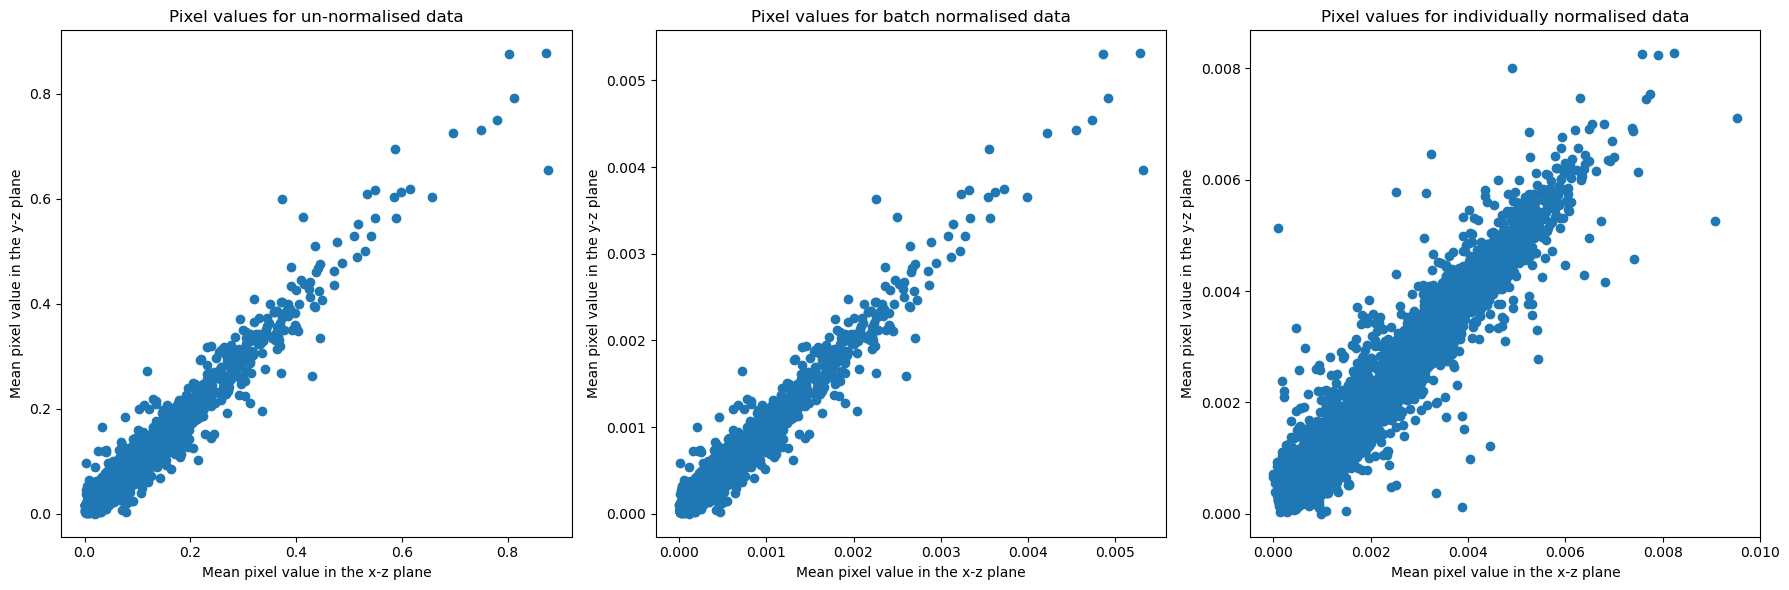

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot of mean pixel values for un-normalised data in the x-z and y-z planes
axs[0].scatter(un_means[:, 0], un_means[:, 1])
axs[0].set_title('Pixel values for un-normalised data')
axs[0].set_xlabel('Mean pixel value in the x-z plane')
axs[0].set_ylabel('Mean pixel value in the y-z plane')

# Scatter plot of mean pixel values for batch normalised data in the x-z and y-z planes
axs[1].scatter(norm_means[:, 0], norm_means[:, 1])
axs[1].set_title('Pixel values for batch normalised data')
axs[1].set_xlabel('Mean pixel value in the x-z plane')
axs[1].set_ylabel('Mean pixel value in the y-z plane')

# Scatter plot of mean pixel values for individually normalised data in the x-z and y-z planes
axs[2].scatter(norm_means2[:, 0], norm_means2[:, 1])
axs[2].set_title('Pixel values for individually normalised data')
axs[2].set_xlabel('Mean pixel value in the x-z plane')
axs[2].set_ylabel('Mean pixel value in the y-z plane')

plt.tight_layout()
plt.show()

Individually normalised data distort the original dataset's attributes, we don't want to train our model on distorted data such that henceforth batch normalisation will be used. Additionally we see that, not wholly unexpectedly, mean pixel values from the x/y-z planes are very similar.

## Binary Classifier
The binary classifier being constructed will aim at classifying muon-neutrino ($\nu_{\mu}$) charged current events (which will be labelled $1$) and other types of events (labelled $0$).

Before starting to code a model, we have to construct our training and testing dataset. For this we loop over and save a given number of files. We save the images, the neutrino and lepton energies, and the interaction type. We join all images together from each given file to form one big file with all the images.

In [10]:
# intialise data arrays 
images = []
interactions = []
nuenergies = []
lepenergies = []

# loop through all data files and fill in the data arrays
for i in range(100,file_num_cap):
    images.append(np.array(data_files[i]['cvnmap'], dtype='float'))
    interactions.append(data_files[i]['neutrino']['interaction'])
    nuenergies.append(data_files[i]['neutrino']['nuenergy'])
    lepenergies.append(data_files[i]['neutrino']['lepenergy'])

C:\Users\Felix\AppData\Local\Temp/ipykernel_33172/1272667216.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  images.append(np.array(data_files[i]['cvnmap'], dtype='float'))


In [11]:
# concatenate all data
lepenergies = np.concatenate(lepenergies)
nuenergies = np.concatenate(nuenergies)
images = np.concatenate(images)
interactions = np.concatenate(interactions) 

C:\Users\Felix\AppData\Local\Temp/ipykernel_33172/191265444.py:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  lepenergies = np.concatenate(lepenergies)
C:\Users\Felix\AppData\Local\Temp/ipykernel_33172/191265444.py:2: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  nuenergies = np.concatenate(nuenergies)
C:\Users\Felix\AppData\Local\Temp/ipykernel_33172/191265444.py:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  interactions = np.concatenate(interactions)


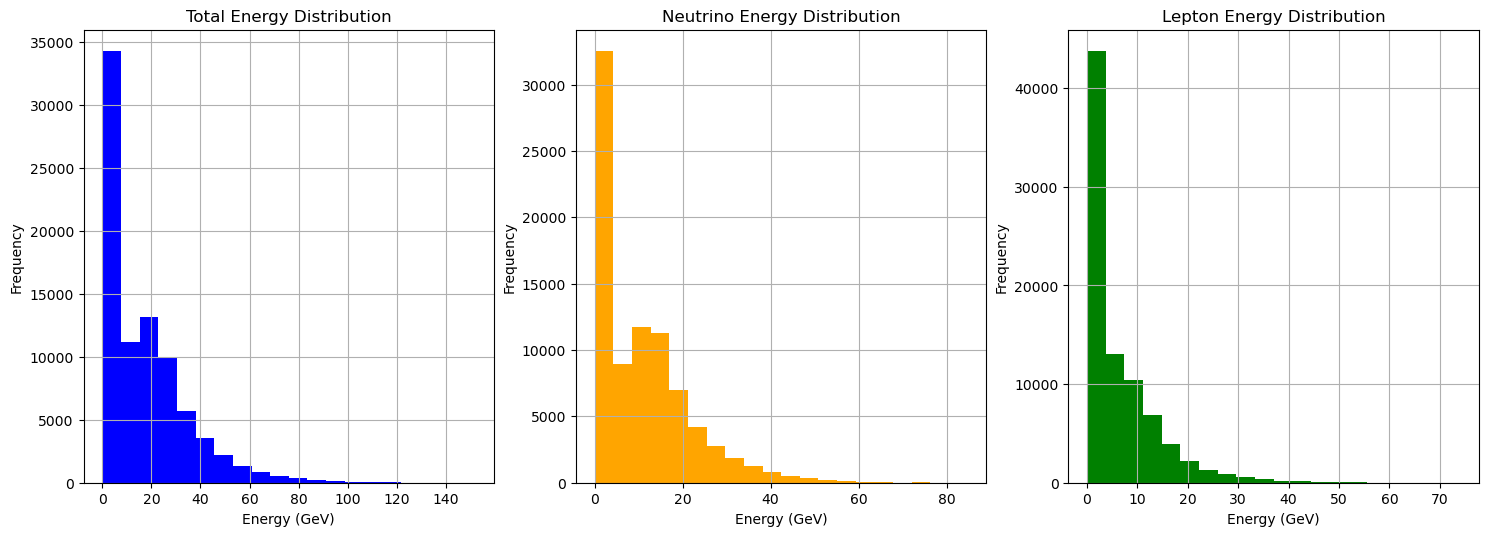

In [12]:
# Create a figure and axes
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # Three side-by-side plots

# Plot Total energies
ax[0].grid(True)
ax[0].set_title("Total Energy Distribution")
ax[0].hist(nuenergies + lepenergies, color='blue', bins=20)
ax[0].set_xlabel('Energy (GeV)')
ax[0].set_ylabel('Frequency')

# Plot Neutrino energies
ax[1].grid(True)
ax[1].set_title("Neutrino Energy Distribution")
ax[1].hist(nuenergies, label='Neutrino energies', color='orange', bins=20)
ax[1].set_xlabel('Energy (GeV)')
ax[1].set_ylabel('Frequency')

# Plot Lepton energies
ax[2].grid(True)
ax[2].set_title("Lepton Energy Distribution")
ax[2].hist(lepenergies, label='Lepton energies', color='green', bins=20)
ax[2].set_xlabel('Energy (GeV)')
ax[2].set_ylabel('Frequency')

plt.show()

Neutrino energies, and correspondingly total energies, appear to have a bigger number of events at lower energies than lepton energies. Lepton energies follow a more decay-like distribution.

In [13]:
# normalising pixel image values
images /= images.max()
# reshaping into array with images.shape[0] number of sets of 2,100,80 images
images = images.reshape((images.shape[0],2,100,80))

In [14]:
len(images), len(interactions)

(83737, 83737)

Below we label all $\nu_{\mu}$ charged current events as $1$ and all the others $0$. Recall that all event numbers up to and including $3$ are $\nu_{\mu}$ charged current events. 

In [15]:
# make data binary, 1 for CC events, 0 otherwise
interactions_bin = (interactions <= 3).astype(int)

In [16]:
print(f'Fraction of CC events to total events: {np.sum(interactions_bin==1)/interactions_bin.size}')

Fraction of CC events to total events: 0.8829669082962132


Approximately 88% of events are muon neutrino CC events. This is important to note, as a model which predicts solely $1$s (i.e. CC events, a positive) is guaranteed to have an accuracy of 88%. Because of this, we're going to create a new dataset with an even spread of positive and negative events and train our model on that, such that it doesn't acquire a bias. If trained on a small number of negative events, relative to the number of positive events, the model will be overly trained to output $1$s and not properly learn to classify negative events.

In [17]:
# make an 80/20 train/test data split
split_num = int(0.8*len(images)) # define the split number at 80% of the length of images array

# split images into train/test datasets
train_images = images[:split_num]
test_images = images[split_num:]

# split labels into train/test labels
train_labels = interactions_bin[:split_num]
test_labels = interactions_bin[split_num:]

In [18]:
# split train/test arrays into images in the xz and yz planes
x_train_images = train_images[:,0]
y_train_images = train_images[:,1]
x_test_images = test_images[:,0]
y_test_images = test_images[:,1]

x_train_images.shape

(66989, 100, 80)

Below we define a function which permits us to create a less biased dataset, with a 50/50 split on $\nu_{\mu}$ charged current events and other events.

In [19]:
def binary_split_data_evenly(data, labels):
    ''' Splits data into an even distribution of positive and negative events.
    
    Args:
        data : multi-dimensional data array of images 
        labels : 1D array of labels

    Returns:
        even_data : multi-dimensional data array of images of even distribution  
        even_labels : 1D labels array of even distribution
    
    '''
    # Find indices of positive and negative samples
    pos_indices = np.where(labels == 1)[0]
    neg_indices = np.where(labels == 0)[0]

    # Find the size of the smallest class
    min_size = min(len(pos_indices), len(neg_indices))

    # Randomly select equal number of positive and negative samples
    selected_pos_indices = np.random.choice(pos_indices, min_size, replace=False)
    selected_neg_indices = np.random.choice(neg_indices, min_size, replace=False)

    # Combine selected indices
    selected_indices = np.concatenate([selected_pos_indices, selected_neg_indices])

    # Shuffle the combined data and labels
    np.random.shuffle(selected_indices)
    
    return data[selected_indices], labels[selected_indices]

In [20]:
# create evenly split datasets
train_images_even, train_labels_even = binary_split_data_evenly(train_images, train_labels)
test_images_even, test_labels_even = binary_split_data_evenly(test_images, test_labels)

In [21]:
print(f'Fraction of muon neutrino CC events to total events: {np.sum(test_labels_even==1)/test_labels_even.size}')

Fraction of muon neutrino CC events to total events: 0.5


Splitting the dataset in this manner has the disadvantage of reducing the size of the training and testing dataset. This can be mitigated by loading in more files. However, memory space places limitations on how many files we can load.

In [22]:
# split even train/test arrays into images in the xz and yz planes
x_train_images_even = train_images_even[:,0]
y_train_images_even = train_images_even[:,1]
x_test_images_even = test_images_even[:,0]
y_test_images_even = test_images_even[:,1]

train_images_even.shape, test_images_even.shape

((15446, 2, 100, 80), (4154, 2, 100, 80))

## Model architectures & training

### First Model

This first model takes in both images into a single branch, and uses a combination of convolutional, pooling and dense layers. Droupout layers are used to stop overfitting.

Model architecture:

- Convolutional Layer: Input shape (100, 80, 2), 32 3x3 filters, activation ReLU
- MaxPooling2D Layer: Pool size 2x2
- Dropout Layer: Dropout rate 0.3
- Convolutional Layer: 32 3x3 filters, activation ReLU
- MaxPooling2D Layer: Pool size 2x2
- Dropout Layer: Dropout rate 0.3
- Flatten Layer
- Dense Layer: 64 units, activation ReLU
- Dropout Layer: Dropout rate 0.3
- Output Layer: 1 unit, activation Sigmoid
   
It has 857,857 parameters.

In [214]:
model1 = keras.models.Sequential()

# set up input layer taking in 2 images 100x80 pixels
model1.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 80, 2)))
model1.add(keras.layers.MaxPooling2D((2, 2)))
model1.add(keras.layers.Dropout(0.3))
model1.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(keras.layers.MaxPooling2D((2, 2)))
model1.add(keras.layers.Dropout(0.3))
#flatten layers for dense layers
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(64, activation='relu'))
model1.add(keras.layers.Dropout(0.3))
# define final layer with sigmoid activation 
model1.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_222 (Conv2D)         (None, 98, 78, 32)        608       
                                                                 
 max_pooling2d_101 (MaxPool  (None, 49, 39, 32)        0         
 ing2D)                                                          
                                                                 
 dropout_30 (Dropout)        (None, 49, 39, 32)        0         
                                                                 
 conv2d_223 (Conv2D)         (None, 47, 37, 32)        9248      
                                                                 
 max_pooling2d_102 (MaxPool  (None, 23, 18, 32)        0         
 ing2D)                                                          
                                                                 
 dropout_31 (Dropout)        (None, 23, 18, 32)       

Training on a batch size of 100 and on 15 epochs and a validation split of 0.2.

In [215]:
# train model
model1History = model1.fit(train_images_even.reshape((len(train_images_even), 100,80,2)), 
                           train_labels_even, epochs=15, batch_size=100, validation_split=0.2)

Epoch 1/15
124/124 [==============================] - 13s 101ms/step - loss: 0.6070 - accuracy: 0.6594 - val_loss: 0.5686 - val_accuracy: 0.6961
Epoch 2/15
124/124 [==============================] - 12s 100ms/step - loss: 0.5355 - accuracy: 0.7239 - val_loss: 0.4984 - val_accuracy: 0.7508
Epoch 3/15
124/124 [==============================] - 12s 96ms/step - loss: 0.4752 - accuracy: 0.7733 - val_loss: 0.4499 - val_accuracy: 0.7929
Epoch 4/15
124/124 [==============================] - 12s 99ms/step - loss: 0.4360 - accuracy: 0.8013 - val_loss: 0.4344 - val_accuracy: 0.8142
Epoch 5/15
124/124 [==============================] - 12s 99ms/step - loss: 0.4218 - accuracy: 0.8114 - val_loss: 0.4205 - val_accuracy: 0.8152
Epoch 6/15
124/124 [==============================] - 12s 98ms/step - loss: 0.4128 - accuracy: 0.8169 - val_loss: 0.4197 - val_accuracy: 0.8223
Epoch 7/15
124/124 [==============================] - 12s 98ms/step - loss: 0.4023 - accuracy: 0.8224 - val_loss: 0.4075 - val_accurac

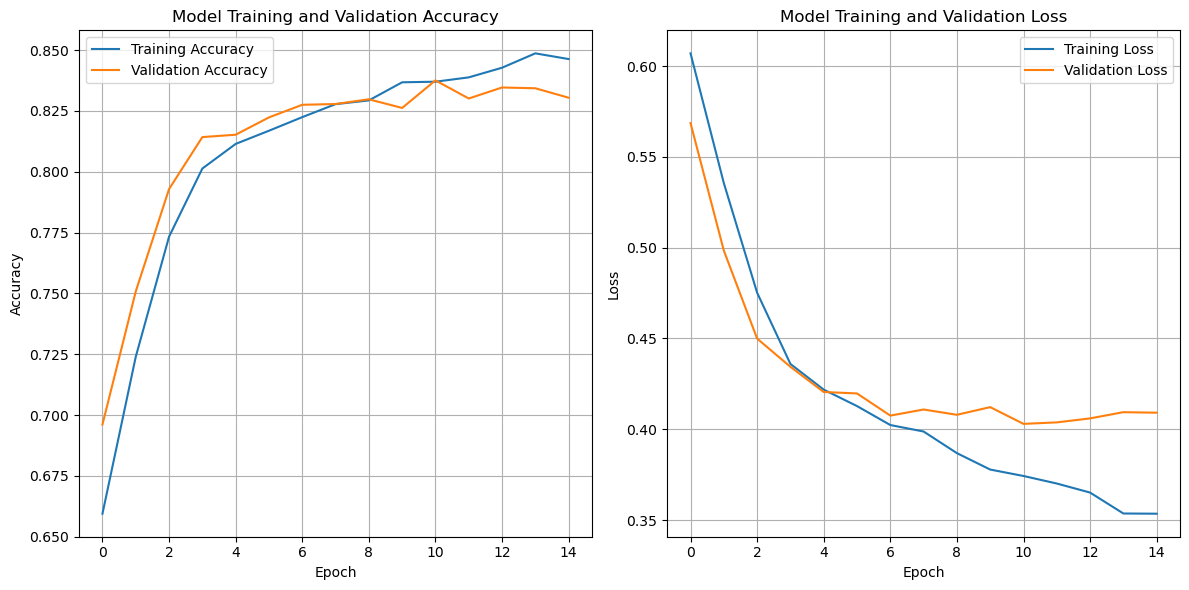

In [216]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for ax in axs:
    ax.grid(True)

# Plot training and validation accuracy
axs[0].plot(model1History.history['accuracy'], label='Training Accuracy')
axs[0].plot(model1History.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(model1History.history['loss'], label='Training Loss')
axs[1].plot(model1History.history['val_loss'], label='Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Model Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

The model clearly overfits the data. Dropout layers don't do enough to counter overfitting, so I will use different methods in other models.

### Second Model

Given the overfitting of the last model, new methods of avoiding overfitting are used. L2 regularisation is a method which adds the sum of the squared values of the model's coefficients to the loss function. It decreases all weight coefficients in the model. 

The model architecture is the same as the first.

In [217]:
model2 = keras.models.Sequential()

# Add Conv2D layer with L2 regularization
model2.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(100, 80, 2)))
model2.add(keras.layers.MaxPooling2D((2, 2)))
model2.add(keras.layers.Dropout(0.3))

# Add Conv2D layer with L2 regularization
model2.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(keras.layers.MaxPooling2D((2, 2)))
model2.add(keras.layers.Dropout(0.3))

model2.add(keras.layers.Flatten())

# Add Dense layer with L2 regularization
model2.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(keras.layers.Dropout(0.5))

model2.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_224 (Conv2D)         (None, 98, 78, 32)        608       
                                                                 
 max_pooling2d_103 (MaxPool  (None, 49, 39, 32)        0         
 ing2D)                                                          
                                                                 
 dropout_33 (Dropout)        (None, 49, 39, 32)        0         
                                                                 
 conv2d_225 (Conv2D)         (None, 47, 37, 32)        9248      
                                                                 
 max_pooling2d_104 (MaxPool  (None, 23, 18, 32)        0         
 ing2D)                                                          
                                                                 
 dropout_34 (Dropout)        (None, 23, 18, 32)       

In [218]:
# train model
model2History = model2.fit(train_images_even.reshape((len(train_images_even), 100,80,2)), 
                           train_labels_even, epochs=20, batch_size=80, validation_split=0.2)

Epoch 1/20
155/155 [==============================] - 13s 81ms/step - loss: 0.8204 - accuracy: 0.5858 - val_loss: 0.6934 - val_accuracy: 0.6385
Epoch 2/20
155/155 [==============================] - 12s 78ms/step - loss: 0.6913 - accuracy: 0.6445 - val_loss: 0.6760 - val_accuracy: 0.6518
Epoch 3/20
155/155 [==============================] - 12s 79ms/step - loss: 0.6796 - accuracy: 0.6572 - val_loss: 0.6676 - val_accuracy: 0.6680
Epoch 4/20
155/155 [==============================] - 13s 81ms/step - loss: 0.6709 - accuracy: 0.6686 - val_loss: 0.6746 - val_accuracy: 0.6728
Epoch 5/20
155/155 [==============================] - 12s 80ms/step - loss: 0.6678 - accuracy: 0.6782 - val_loss: 0.6544 - val_accuracy: 0.6871
Epoch 6/20
155/155 [==============================] - 13s 82ms/step - loss: 0.6656 - accuracy: 0.6789 - val_loss: 0.6547 - val_accuracy: 0.6896
Epoch 7/20
155/155 [==============================] - 12s 80ms/step - loss: 0.6622 - accuracy: 0.6869 - val_loss: 0.6501 - val_accuracy:

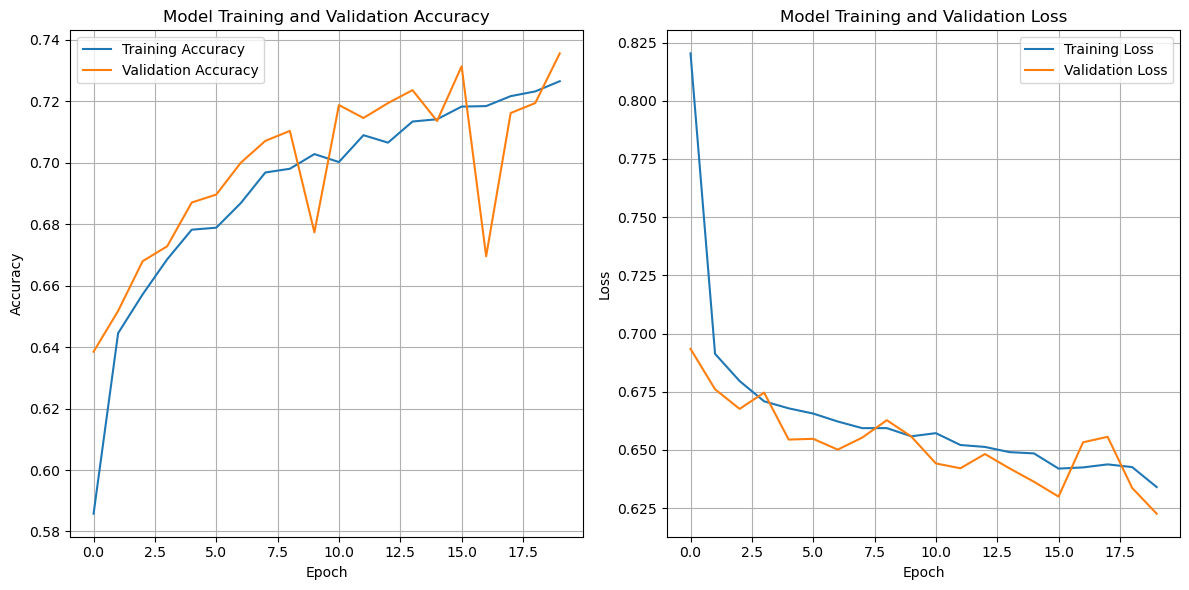

In [219]:
# Create a figure and axes for the plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Enable grid on the plots
for ax in axs:
    ax.grid(True)

# Plot training and validation accuracy
axs[0].plot(model2History.history['accuracy'], label='Training Accuracy')
axs[0].plot(model2History.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(model2History.history['loss'], label='Training Loss')
axs[1].plot(model2History.history['val_loss'], label='Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Model Training and Validation Loss')
axs[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

Adding L2 regularisation has worked well. The model has clearly not overfitted, though the final accuracy has dropped significantly. I will be using L2 regularisation in all future models.

### Third Model (A multi-view CNN)

Here I try a model which uses two separate convolutional branches, which then merge together, commonly referred to as a multi-view convolutional neural network.

The model architecture is as follows:

1. XZ and YZ Plane Branches:
   - Input layer: shape = (100, 80, 1)
   - Conv2D layer with 64 filters of size (3, 3) and ReLU activation
   - MaxPooling2D layer with pool size (2, 2)
   - Conv2D layer with 64 filters of size (3, 3) and ReLU activation
   - MaxPooling2D layer with pool size (2, 2)
   
   
2. Joint Layers:
   - Concatenation layer merging the outputs of the XZ and YZ branches
   - Conv2D layer with 128 filters of size (5, 5) and ReLU activation
   - MaxPooling2D layer with pool size (2, 2)


3. Output Layers:
   - Flatten layer
   - Dense layer with 64 units and ReLU activation
   - Dense layer with 32 units and ReLU activation
   - Output layer with 1 unit and Sigmoid activation
   
It has 1,486,465 parameters.

In [249]:
# Define the input shape for each image
input_shape = (100, 80, 1)  # Single image of size 100x80 pixels

# Define the xz plane input
x_input = layers.Input(shape=input_shape, name='xz_plane_input')
# Define the yz plane input
y_input = layers.Input(shape=input_shape, name='yz_plane_input')

# define xz plane network
x_conv2D = layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01))(x_input)
x_pool2D = layers.MaxPooling2D((2,2))(x_conv2D)
x_2nd_conv2D = layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01))(x_pool2D)  # Reduced regularization strength
x_2nd_pool2D = layers.MaxPooling2D((2,2))(x_2nd_conv2D)

# define yz plane network
y_conv2D = layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01))(y_input)
y_pool2D = layers.MaxPooling2D((2,2))(y_conv2D)
y_2nd_conv2D = layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0))(y_pool2D)  # Reduced regularization strength
y_2nd_pool2D = layers.MaxPooling2D((2,2))(y_2nd_conv2D)

# merge layers
merged_layer = layers.concatenate([x_2nd_pool2D, y_2nd_pool2D], axis=1)

# Joint convolutional & pooling layers
joint_conv2d = layers.Conv2D(128,(5,5), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01))(merged_layer)
joint_pool2d = layers.MaxPooling2D((2,2))(joint_conv2d)

# Flatten the output for dense layers
flatten_layer = layers.Flatten()(joint_pool2d)

# Dense layers
dense_layer = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0))(flatten_layer)  # Reduced regularization strength
dense_2nd_layer = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(dense_layer)

# Output layer with sigmoid activation
output_layer = layers.Dense(1, activation='sigmoid')(dense_2nd_layer)

# Construct the model
model3 = models.Model(inputs=[x_input, y_input], outputs=output_layer)

# Compile the model 
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model3.summary()

Model: "model_25"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 xz_plane_input (InputLayer  [(None, 100, 80, 1)]         0         []                            
 )                                                                                                
                                                                                                  
 yz_plane_input (InputLayer  [(None, 100, 80, 1)]         0         []                            
 )                                                                                                
                                                                                                  
 conv2d_298 (Conv2D)         (None, 98, 78, 64)           640       ['xz_plane_input[0][0]']      
                                                                                           

In [250]:
# train model
model3History = model3.fit([x_train_images_even, y_train_images_even], train_labels_even, epochs=15, batch_size=64,
                           validation_split=0.2)

Epoch 1/15
194/194 [==============================] - 56s 282ms/step - loss: 0.9122 - accuracy: 0.6763 - val_loss: 0.6596 - val_accuracy: 0.7107
Epoch 2/15
194/194 [==============================] - 55s 283ms/step - loss: 0.6004 - accuracy: 0.7306 - val_loss: 0.5744 - val_accuracy: 0.7434
Epoch 3/15
194/194 [==============================] - 54s 277ms/step - loss: 0.5521 - accuracy: 0.7634 - val_loss: 0.5805 - val_accuracy: 0.7550
Epoch 4/15
194/194 [==============================] - 54s 276ms/step - loss: 0.5317 - accuracy: 0.7818 - val_loss: 0.5398 - val_accuracy: 0.7683
Epoch 5/15
194/194 [==============================] - 55s 285ms/step - loss: 0.5050 - accuracy: 0.7898 - val_loss: 0.5246 - val_accuracy: 0.7786
Epoch 6/15
194/194 [==============================] - 57s 295ms/step - loss: 0.5073 - accuracy: 0.7872 - val_loss: 0.5476 - val_accuracy: 0.7612
Epoch 7/15
194/194 [==============================] - 55s 285ms/step - loss: 0.5011 - accuracy: 0.7909 - val_loss: 0.5107 - val_ac

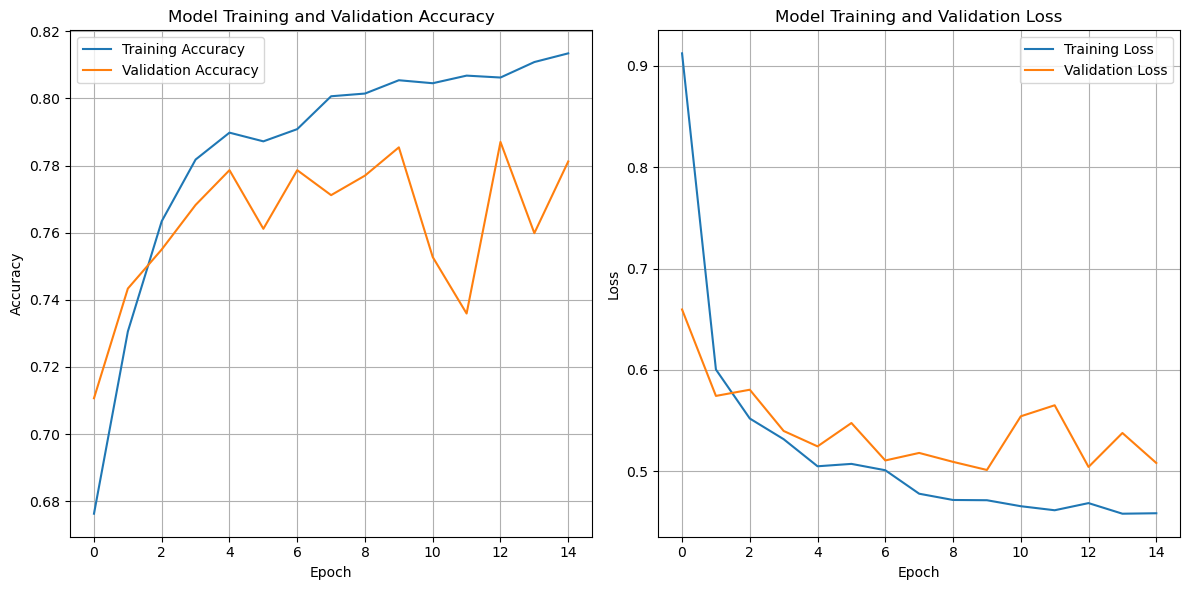

In [251]:
# Create a figure and axes for the plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Enable grid on the plots
for ax in axs:
    ax.grid(True)

# Plot training and validation accuracy
axs[0].plot(model3History.history['accuracy'], label='Training Accuracy')
axs[0].plot(model3History.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(model3History.history['loss'], label='Training Loss')
axs[1].plot(model3History.history['val_loss'], label='Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Model Training and Validation Loss')
axs[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

The additional parameters and structure have increased the model's accuracy in training. The regularisation values have been altered several times through a grid search, increasing values by 0.005 and 0.01 was found to be the best value. Similarly, 64 filters was found to be the limit above which the number of filters does not improve performance. There is a balance to be achieved, between over regularising, which causes the model to not learn effectively, and too little regularisation, which leads to overfitting. The model has reached a larger validation accuracy than the first model for the same number of epochs. Because of this I'll try to add some more parameters.

### Fourth Model

Inspired on a similar model used in https://ar5iv.labs.arxiv.org/html/1604.01444, my own model makes use of an inception module. The inception module used is comprised of four branches which get concatenated. Its purpose is to allow for our convolutional model to benefit from multi-level feature extraction. The model used has two identical branches to accomodate for x-z plane and y-z plane images.

The model architecture for the branches used is as follows.

1. XZ and YZ Plane Branches:
   - Input layer: shape = (100, 80, 1)
   - Conv2D layer with 64 filters of size (3, 3) and ReLU activation
   - MaxPooling2D layer with pool size (2, 2)
   - Conv2D layer with 64 filters of size (3, 3) and ReLU activation
   - MaxPooling2D layer with pool size (2, 2)
   - Inception module with:
     - 1x1 Conv2D layer with 128 filters and ReLU activation
     - 3x3 Conv2D layer with 128 filters and ReLU activation
     - 5x5 Conv2D layer with 32 filters and ReLU activation
     - 1x1 Conv2D layer with 64 filters and ReLU activation
   - Dropout layer with a dropout rate of 0.4
   
   
2. Joint Layers:
   - Concatenation layer merging the outputs of the XZ and YZ branches
   - Conv2D layer with 128 filters of size (5, 5) and ReLU activation
   - MaxPooling2D layer with pool size (2, 2)


3. Output Layers:
   - Flatten layer
   - Dense layer with 64 units and ReLU activation
   - Dense layer with 32 units and ReLU activation
   - Output layer with 1 unit and Sigmoid activation

   
The total number of trainable parameters are $2,800,257$.

In [252]:
def inception_module(input_layer, filters):
    """
    Creates an Inception module.
    
    Parameters:
        input_layer (tensor): Input tensor for the Inception module.
        filters (list): List of 4 integers specifying the number of filters for each branch.
            filters[0]: Number of 1x1 filters for the first branch.
            filters[1]: Number of 3x3 filters for the second branch.
            filters[2]: Number of 5x5 filters for the third branch.
            filters[3]: Number of filters for the max pooling branch.
    
    Returns:
        tensor: Output tensor of the Inception module.
    """
    
    # 1x1 convolution branch
    branch1x1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu',)(input_layer)
    
    # 3x3 convolution branch
    branch3x3 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(input_layer)
    branch3x3 = layers.Conv2D(filters[1], (3, 3), padding='same', activation='relu')(branch3x3)
    
    # 5x5 convolution branch
    branch5x5 = layers.Conv2D(filters[2], (1, 1), padding='same', activation='relu')(input_layer)
    branch5x5 = layers.Conv2D(filters[2], (5, 5), padding='same', activation='relu')(branch5x5)
    
    # Max pooling branch
    branch_pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_layer)
    branch_pool = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(branch_pool)
    
    # Concatenate the branches
    output_layer = layers.concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    
    return output_layer

In [253]:
# Define the input shape for each image
input_shape = (100, 80, 1)  # Single image of size 100x80 pixels

# Define the xz plane input
x_input = layers.Input(shape=input_shape, name='xz_plane_input')
# Define the yz plane input
y_input = layers.Input(shape=input_shape, name='yz_plane_input')

# define xz plane network
x_conv2D = layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01))(x_input)
x_pool2D = layers.MaxPooling2D((2,2))(x_conv2D)
x_2nd_conv2D = layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01))(x_pool2D)
x_2nd_pool2D = layers.MaxPooling2D((2,2))(x_2nd_conv2D)
x_inc = inception_module(x_2nd_pool2D,[128, 128, 32, 64]) # Apply Inception module
x_2nd_dropout = layers.Dropout(0.4)(x_inc)  # Adding dropout after the second pooling layer

# define yz plane network
y_conv2D = layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01))(y_input)
y_pool2D = layers.MaxPooling2D((2,2))(y_conv2D)
y_2nd_conv2D = layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01))(y_pool2D)
y_2nd_pool2D = layers.MaxPooling2D((2,2))(y_2nd_conv2D)
y_inc = inception_module(y_2nd_pool2D,[128, 128, 32, 64]) # Apply Inception module
y_2nd_dropout = layers.Dropout(0.4)(y_inc)  # Adding dropout after the second pooling layer

# merge layers
merged_layer = layers.concatenate([x_2nd_dropout, y_2nd_dropout], axis=1)

# Joint convolutional & pooling layers
joint_conv2d = layers.Conv2D(128,(5,5), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01))(merged_layer)
joint_pool2d = layers.MaxPooling2D((2,2))(joint_conv2d)

# Flatten the output for dense layers
flatten_layer = layers.Flatten()(joint_pool2d)

# Dense layers
dense_layer = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0))(flatten_layer)
dense_2nd_layer = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0))(dense_layer)

# Output layer with sigmoid activation
output_layer = layers.Dense(1, activation='sigmoid')(dense_2nd_layer)

# Construct the model
model4 = models.Model(inputs=[x_input, y_input], outputs=output_layer)

# Compile the model 
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model4.summary()

Model: "model_26"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 xz_plane_input (InputLayer  [(None, 100, 80, 1)]         0         []                            
 )                                                                                                
                                                                                                  
 yz_plane_input (InputLayer  [(None, 100, 80, 1)]         0         []                            
 )                                                                                                
                                                                                                  
 conv2d_303 (Conv2D)         (None, 98, 78, 64)           640       ['xz_plane_input[0][0]']      
                                                                                           

 dense_88 (Dense)            (None, 64)                   1204288   ['flatten_31[0][0]']          
                                                                                                  
 dense_89 (Dense)            (None, 32)                   2080      ['dense_88[0][0]']            
                                                                                                  
 dense_90 (Dense)            (None, 1)                    33        ['dense_89[0][0]']            
                                                                                                  
Total params: 2800257 (10.68 MB)
Trainable params: 2800257 (10.68 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [254]:
# train model
model4History = model4.fit([x_train_images_even, y_train_images_even], train_labels_even, epochs=15, batch_size=100,
                           validation_split=0.2)

Epoch 1/15
124/124 [==============================] - 132s 1s/step - loss: 0.9843 - accuracy: 0.6557 - val_loss: 0.6156 - val_accuracy: 0.6968
Epoch 2/15
124/124 [==============================] - 136s 1s/step - loss: 0.5922 - accuracy: 0.7131 - val_loss: 0.5840 - val_accuracy: 0.7068
Epoch 3/15
124/124 [==============================] - 134s 1s/step - loss: 0.5733 - accuracy: 0.7182 - val_loss: 0.5770 - val_accuracy: 0.7162
Epoch 4/15
124/124 [==============================] - 134s 1s/step - loss: 0.5521 - accuracy: 0.7369 - val_loss: 0.5595 - val_accuracy: 0.7437
Epoch 5/15
124/124 [==============================] - 134s 1s/step - loss: 0.5293 - accuracy: 0.7579 - val_loss: 0.5228 - val_accuracy: 0.7602
Epoch 6/15
124/124 [==============================] - 135s 1s/step - loss: 0.5325 - accuracy: 0.7620 - val_loss: 0.5296 - val_accuracy: 0.7583
Epoch 7/15
124/124 [==============================] - 135s 1s/step - loss: 0.5081 - accuracy: 0.7757 - val_loss: 0.5271 - val_accuracy: 0.7482

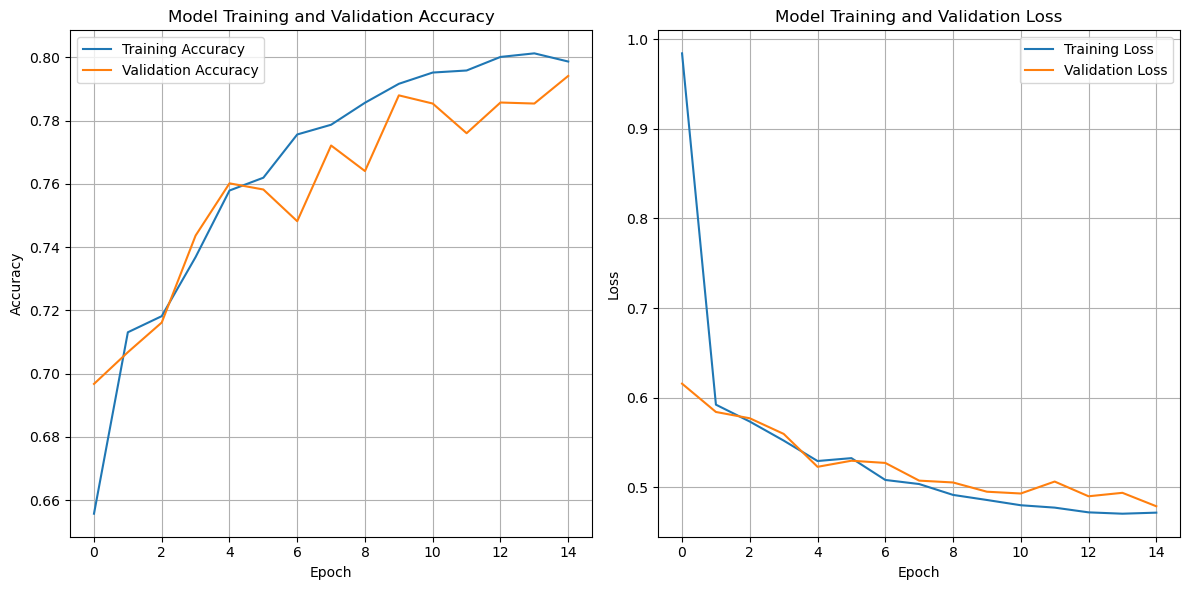

In [255]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for ax in axs:
    ax.grid(True)

# Plot training and validation accuracy
axs[0].plot(model4History.history['accuracy'], label='Training Accuracy')
axs[0].plot(model4History.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(model4History.history['loss'], label='Training Loss')
axs[1].plot(model4History.history['val_loss'], label='Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Model Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

Lower values for the L2 regularisation was found to lead to higher validation accuracies. The bigger number of parameters meant that the model took significantly longer to train. Compared to the previous model it achieved a slightly larger accuracy but with much less overfitting. Because of these details, this is the model that I will use for further investigations.

# 2. Testing the classifier and its dependence on metadata

## The Receiver Operating Characterisitc Curve

Before following through with evaluating the model on its dependence on metadata we need to find an appropriate threshold above which a given prediction by the model its read as a $1$ and below which it is read as a $0$. To do so we calculate the model's Receiver Operating Characteristic (ROC) curve. The ROC curve tells us the classifier's predictive ability for different choices of thresholds. It makes use of the models *specificity*: 

$$
\frac{\text{{number of false positives}}}{{\text{{number of false positives}} + \text{{number of true negatives}}}}
$$

and its *sensitivity*:
$$
\frac{\text{{number of true positives}}}{{\text{{number of true positives}} + \text{{number of false negatives}}}}
$$

To choose a threshold we have to consider how much of a tradeoff we are willing to accept between a high true positive rate and a low false positive rate.

In [257]:
# concatenate test labels
test_labels_even = np.concatenate(test_labels_even)

# acquire model's predictive score on the test data
score = model4.predict([x_test_images_even, y_test_images_even])

# use sklearn.metrics to calculate false positive and true postive rates for different thresholds
fpr, tpr, threshold  =  metrics.roc_curve(test_labels_even, score)

130/130 [==============================] - 14s 103ms/step


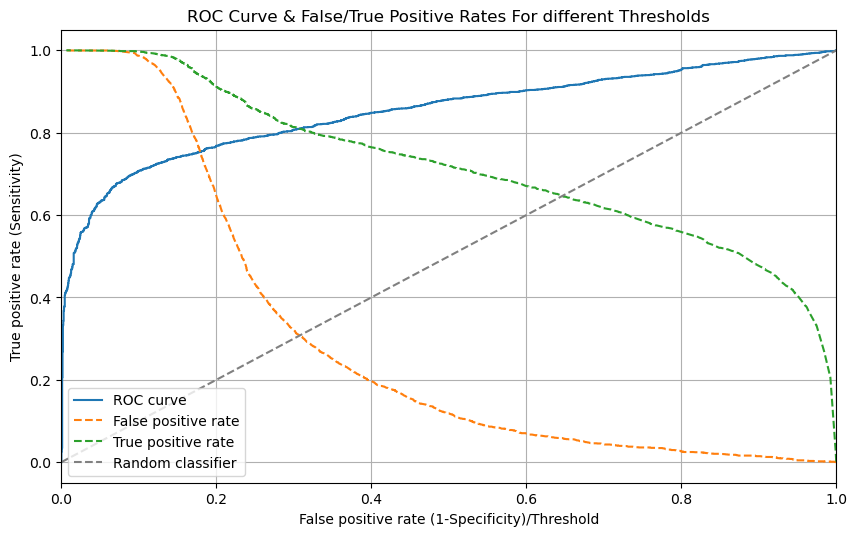

In [258]:
# plot the ROC curve
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(fpr, tpr, label='ROC curve') # Plot ROC curve
plt.plot(threshold, fpr, '--', label='False positive rate') # Plot false positive rate
plt.plot(threshold, tpr, '--', label='True positive rate') # Plot true positive rate
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random classifier') # Plot random classifier
plt.xlim(0, 1) 
plt.title('ROC Curve & False/True Positive Rates For different Thresholds')
plt.xlabel('False positive rate (1-Specificity)/Threshold')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend()
plt.show()

Our model certainly does better than a random classifier, which points to it having learned classification effectively. The rate of false positives falls faster than the true positive rate which is good as it means that the models predictions are more confined to the edges, meaning that it predicts events correctly with more certainty. 

To choose the threshold which I'll use for future analysis, I take the differences between the true positive and false positive rates, and use the threshold which maximises that difference. This is done below. It is important to note that threshold choice is highly contextual, and depends on the tolerance accepted of things like false positives or false negatives.

In [259]:
# compute differences of true/false positive rates
rates_differences = tpr-fpr
# extract threshold corresponding to maximum difference
best_thres = threshold[np.argmax(rates_differences)]
print(f"The threshold which maximises the difference between true positive and false positive rates is: {best_thres}")

The threshold which maximises the difference between true positive and false positive rates is: 0.5492873191833496


I will use a rounded value of 0.549.

## Simple model testing

Below, the model is tested on the test data with a threshold of 0.549 and its predictions are plotted.

In [263]:
# evaluate model's accuracy, loss and true negatives
test_loss, test_accuracy = model4.evaluate([x_test_images_even, y_test_images_even], test_labels_even)

130/130 [==============================] - 13s 102ms/step - loss: 0.4778 - accuracy: 0.8004


In [264]:
print(f"Model's test accuracy is: {test_accuracy}")

Model's test accuracy is: 0.8004437685012817


In [265]:
# produce model's predictions
predictions = model4.predict([x_test_images_even, y_test_images_even])

130/130 [==============================] - 13s 103ms/step


In [266]:
# convert model's predictions into 0s and 1s using chosen threshold of 0.6
predictions_binary = (predictions > 0.549).astype(int)

# calculate model's accuracy score on test dataset using the 0.6 threshold
acc = metrics.accuracy_score(test_labels_even, predictions_binary, normalize=True)
print(acc)

0.8038035628310063


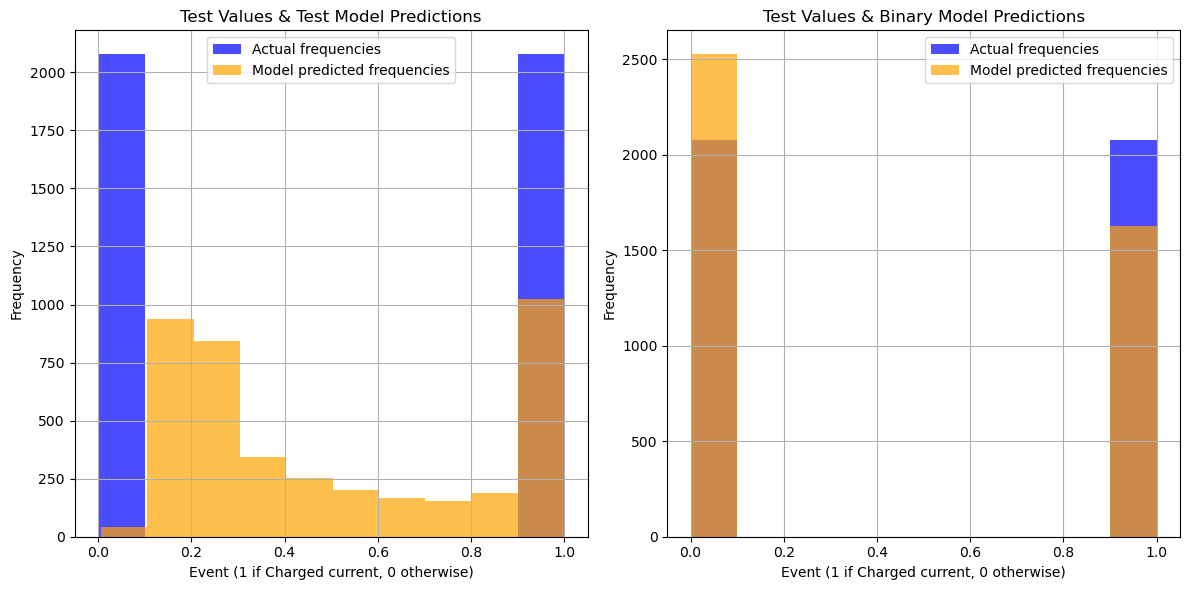

In [267]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram
axs[0].set_title('Test Values & Test Model Predictions')
axs[0].grid(True)
axs[0].set_ylabel('Frequency')
axs[0].set_xlabel("Event (1 if Charged current, 0 otherwise)")
axs[0].hist(test_labels_even, label="Actual frequencies", color='blue', alpha=0.7)
axs[0].hist(predictions, label="Model predicted frequencies", color='orange', alpha=0.7)
axs[0].legend()

# Plot the second histogram
axs[1].set_title('Test Values & Binary Model Predictions')
axs[1].grid(True)
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel("Event (1 if Charged current, 0 otherwise)")
axs[1].hist(test_labels_even, label="Actual frequencies", color='blue', alpha=0.7)
axs[1].hist(predictions_binary, label="Model predicted frequencies", color='orange', alpha=0.7)
axs[1].legend()

plt.tight_layout()
plt.show()

We can see that with our chosen threshold the model's predictions over predict 0s and underpredict 1s for the chosen threshold. Additionally, its positive predictions are much more confined to the edges compared to its negative predictions, which may suggest that it predicts positive events with more certainty. For clarity, the brown colour indicates a mixture of actual and predicted frequencies.

## Testing classifier's energy dependence

Here we test how well our model does on data for different energies of different events. The energies considered are $\nu_{\mu}$, lepton and their added energies.

In [268]:
# add energies to create a total energies array
total_energies = nuenergies+lepenergies 

# create arrays which cover only test length
test_total_energies = total_energies[split_num:]
test_nuenergies = nuenergies[split_num:]
test_lepenergies = lepenergies[split_num:]

The functions below allow for sorting data images according to their energies. The method performed is one of arranging the energies (and accordingly, images) in ascending order, then splitting them into 30 arrays and taking the mean of the energies in each array. The model then predicts on all the images of each array and we plot the accuracies against their mean energies.

In [269]:
def calculate_energy_accuracies(labels, x_images, y_images):
    """
    Calculate the accuracies for each energy sample using model4 predictions.

    Args:
        labels (array): Array containing the binary labels for each energy sample.
        x_images (array): Array containing the xz plane images for each energy sample.
        y_images (array): Array containing the yz plane images for each energy sample.

    Returns:
        list: List of accuracies corresponding to each energy sample.
    """
    accuracies = []
    for i in range(len(labels)):
        # Predict using the model4
        predictions = model4.predict([x_images[i], y_images[i]])
        # Convert predictions to binary (0,1)
        predictions_binary = (predictions > 0.549).astype(int)
        # Calculate accuracy
        accuracy = metrics.accuracy_score(labels[i], predictions_binary, normalize=True)
        accuracies.append(accuracy)
    return accuracies

def sort_mean_energies(energies_array, num_arrays):
    """
    Sort the mean energies into ascending order and split them into multiple arrays.

    Args:
        energies_array (array): Array containing mean energies.
        num_arrays (int): Number of arrays to split the sorted energies into.

    Returns:
        array: Array containing the mean energies sorted and split.
    """
    # Sort and split the energies
    sorted_energies = np.sort(np.concatenate(energies_array))
    sorted_energies_split = np.array_split(sorted_energies, num_arrays)
    # Calculate mean energies for each split
    mean_energies = np.array([np.mean(i) for i in sorted_energies_split])
    return mean_energies

def create_energy_data(energies, images):
    """
    Create energy data by sorting labels and images based on sorted energies.

    Args:
        energies (array): Array containing energy values.

    Returns:
        tuple: Tuple containing x_images_split, y_images_split, and split_energy_labels.
    """
    # Sort energy labels and images
    energy_labels = interactions_bin[split_num:]
    sorted_indices = np.argsort(np.concatenate(energies))
    energy_labels = energy_labels[sorted_indices].reshape((len(energies)))
    split_energy_labels = np.array_split(energy_labels, 30)
    
    # Split images into xz and yz planes based on sorted energies
    x_images = images[:, 0]
    y_images = images[:, 1]
    y_images = y_images[sorted_indices].reshape((len(energies), 100, 80))
    x_images = x_images[sorted_indices].reshape((len(energies), 100, 80))
    # create a list of 30 arrays of images
    y_images_split, x_images_split = np.array_split(y_images, 30), np.array_split(x_images, 30)
    
    return x_images_split, y_images_split, split_energy_labels

In [270]:
# acquire mean total, neutrino and lepton energies
mean_total_energies = sort_mean_energies(test_total_energies,30)
mean_neutrino_energies = sort_mean_energies(test_nuenergies,30)
mean_lepton_energies = sort_mean_energies(test_lepenergies,30)

In [271]:
# create data images and labels for total, neutrino and lepton energies
ximages_total, yimages_total, total_labels = create_energy_data(test_total_energies, test_images)
ximages_neutrino, yimages_neutrino, neutrino_labels = create_energy_data(test_nuenergies, test_images)
ximages_lepton, yimages_lepton, lepton_labels = create_energy_data(test_lepenergies, test_images)

In [272]:
# calculate accuracies for total, neutrino and lepton energies
total_energy_accuracies = calculate_energy_accuracies(total_labels, ximages_total, yimages_total)
neutrino_energy_accuracies = calculate_energy_accuracies(neutrino_labels, ximages_neutrino, yimages_neutrino)
lepton_energy_accuracies = calculate_energy_accuracies(lepton_labels, ximages_lepton, yimages_lepton)

18/18 [==============================] - 2s 100ms/step


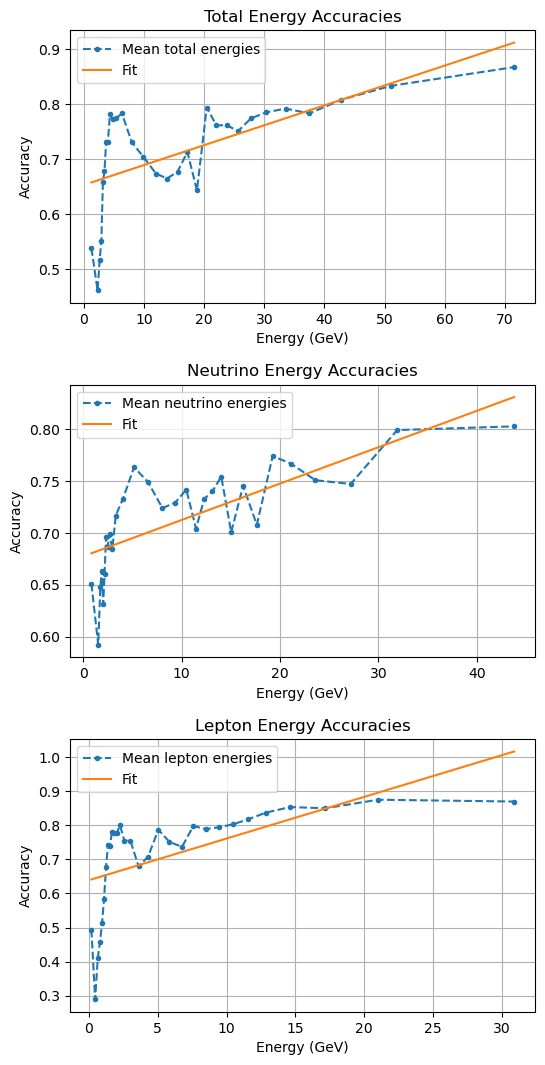

In [273]:
# Create a figure and three subplots with increased spacing
fig, axs = plt.subplots(3, 1, figsize=(6, 13), gridspec_kw={'hspace': 0.3})

# Plot Total energy accuracies
axs[0].plot(mean_total_energies, total_energy_accuracies, '.--', label='Mean total energies')
axs[0].grid(True)
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel('Energy (GeV)')
axs[0].legend()
axs[0].set_title("Total Energy Accuracies")
# Generate and plot the fit
fit_coeffs_total = np.polyfit(mean_total_energies, total_energy_accuracies, 1)
fit_total = np.poly1d(fit_coeffs_total)
axs[0].plot(mean_total_energies, fit_total(mean_total_energies), label='Fit')
axs[0].legend()

# Plot Neutrino energy accuracies
axs[1].plot(mean_neutrino_energies, neutrino_energy_accuracies, '.--', label='Mean neutrino energies')
axs[1].grid(True)
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel('Energy (GeV)')
axs[1].legend()
axs[1].set_title("Neutrino Energy Accuracies")
# Generate and plot the fit
fit_coeffs_neutrino = np.polyfit(mean_neutrino_energies, neutrino_energy_accuracies, 1)
fit_neutrino = np.poly1d(fit_coeffs_neutrino)
axs[1].plot(mean_neutrino_energies, fit_neutrino(mean_neutrino_energies), label='Fit')
axs[1].legend()

# Plot Lepton energy accuracies
axs[2].plot(mean_lepton_energies, lepton_energy_accuracies, '.--', label='Mean lepton energies')
axs[2].grid(True)
axs[2].set_xlabel('Energy (GeV)')
axs[2].set_ylabel("Accuracy")
axs[2].legend()
axs[2].set_title("Lepton Energy Accuracies")
# Generate and plot the fit
fit_coeffs_lepton = np.polyfit(mean_lepton_energies, lepton_energy_accuracies, 1)
fit_lepton = np.poly1d(fit_coeffs_lepton)
axs[2].plot(mean_lepton_energies, fit_lepton(mean_lepton_energies), label='Fit')
axs[2].legend()

plt.show()

The general trend observed is that accuracies tend to grow with increasing energies. Events with higher energies produce greater visual 'spikes' in the images, as well as longer tracks due to their high penetrative power. All of this makes it easier for the model to distinguish these events and classify them correctly, as convolutional layers will be more effective at extracting features.

## Testing classifier's dependence on type of interaction

Here we look at how the accuracy of the model depends on the type of interaction considered. The interactions looked at will be the $\nu_{\mu}$ deep inelastic scattering (DIS) charged current (CC), quasi-elastic (QE), resonant (RES), other $\nu_{\mu}$ interactions, and other non-muon-neutrino interactions.

In [274]:
# intialise array for storing types of events
event_types = []

# loop through all data files and fill in the data arrays
for i in range(100,112):
    event_types.append(data_files[i]['neutrino']['interaction'])

# concatenate to form one cohesive array
event_types = np.concatenate(event_types, axis=0)
# truncate array into the same length as test arrays
event_test_types = event_types[split_num:]

C:\Users\Felix\AppData\Local\Temp/ipykernel_33044/282054613.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  event_types = np.concatenate(event_types, axis=0)


In [275]:
# Initialise lists to hold images for each category
event0_images = [] # QE images
event1_images = [] # RES images
event2_images = [] # DIS images
event3_images = [] # other muon-neutrino images
event4_images = [] # the 'otherwise' (non muon-neutrino) events images

# Initialise lists to hold labels for each category
event0_labels = [] # QE labels
event1_labels = [] # RES labels
event2_labels = [] # DIS labels
event3_labels = [] # other muon-neutrino labels
event4_labels = [] # the 'otherwise' events, all 0 labels

# Loop through each number in test events and corresponding image
# events 0,1,2,3 are muon-neutrino events, 4 is anything else
for event, img in zip(event_test_types, test_images):
    if event == 0: # QE
        event0_images.append(img)
        event0_labels.append(1)
    elif event == 1: # RES
        event1_images.append(img)
        event1_labels.append(1)
    elif event == 2: # DIS
        event2_images.append(img)
        event2_labels.append(1)
    elif event == 3: # other muon-neutrino 
        event3_images.append(img)
        event3_labels.append(1)
    else: # other
        event4_images.append(img)
        event4_labels.append(0)

# Convert lists to arrays
event0_images = np.array(event0_images)
event1_images = np.array(event1_images)
event2_images = np.array(event2_images)
event3_images = np.array(event3_images)
event4_images = np.array(event4_images)

It is important to investigate the distribution of events across the data, to know if any biases were present which could have skewed the model to predict some events better than simply for lack of training data. I investigate this below.

<BarContainer object of 5 artists>

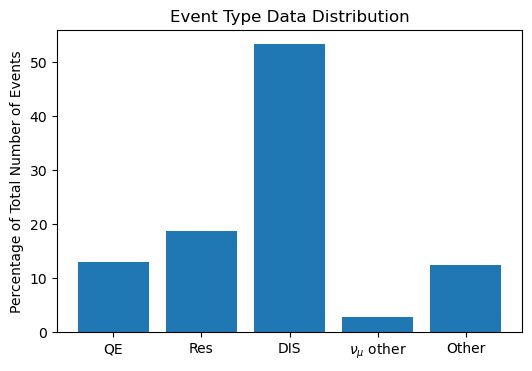

In [276]:
# create array of names and of accuracies for plotting
event_names = ['QE', 'Res', 'DIS', r'$\nu_{\mu}$ other', 'Other']
total_num_events = len(event0_images) + len(event1_images) + len(event2_images) + len(event3_images) + len(event4_images)
event_fractions = np.array([len(event0_images)/total_num_events, len(event1_images)/total_num_events, len(event2_images)/total_num_events, len(event3_images)/total_num_events, len(event4_images)/total_num_events])

plt.title("Event Type Data Distribution")
plt.ylabel("Percentage of Total Number of Events")
plt.bar(event_names, 100*event_fractions)

There is a significant over representation of DIS events over others, and very varying percentages. This might've affected the model during training, making it more accurate at classifying DIS & Res events over others.

The functions below allow us to split all the events' images into xz/yz plane images, as well as calculating the accuracies for these given images. 

In [277]:
def construct_xy_images(images):
    """
    Construct xz and yz plane images from the given images.

    Args:
        images (array): Array containing xz and yz plane images.

    Returns:
        tuple: Tuple containing x_images and y_images.
    """
    # split images into array images for xz and yz planes
    x_images = images[:, 0]
    y_images = images[:, 1]

    # reshape x and y image arrays to allow for predictions
    y_images = y_images.reshape((len(images), 100, 80))
    x_images = x_images.reshape((len(images), 100, 80))
    return x_images, y_images

def get_interaction_accuracy(x_images, y_images, labels):
    """
    Calculate the accuracy of interactions using model4's predictions.

    Args:
        x_images (array): Array containing xz plane images.
        y_images (array): Array containing yz plane images.
        labels (array): Array containing the binary labels for interactions.

    Returns:
        float: Accuracy of interactions.
    """
    # generate model's predictions
    predictions = model4.predict([x_images, y_images])
    predictions_binary = (predictions > 0.549).astype(int)
    accuracy = metrics.accuracy_score(labels, predictions_binary, normalize=True)
    return accuracy

In [278]:
# create xz and yz plane images for each event type
event0_ximages, event0_yimages = construct_xy_images(event0_images)
event1_ximages, event1_yimages = construct_xy_images(event1_images)
event2_ximages, event2_yimages = construct_xy_images(event2_images)
event3_ximages, event3_yimages = construct_xy_images(event3_images)
event4_ximages, event4_yimages = construct_xy_images(event4_images)

# get the accuracies on each event using xz and yz plane images and labels
event0_accuracy = get_interaction_accuracy(event0_ximages, event0_yimages, event0_labels)
event1_accuracy = get_interaction_accuracy(event1_ximages, event1_yimages, event1_labels)
event2_accuracy = get_interaction_accuracy(event2_ximages, event2_yimages, event2_labels)
event3_accuracy = get_interaction_accuracy(event3_ximages, event3_yimages, event3_labels)
event4_accuracy = get_interaction_accuracy(event4_ximages, event4_yimages, event4_labels)

65/65 [==============================] - 7s 100ms/step


In [279]:
# display model accuracies (QE, RE, DIS, other_muon_neutrino, other)
event0_accuracy, event1_accuracy, event2_accuracy, event3_accuracy, event4_accuracy

(0.808952468850946,
 0.6978004462862608,
 0.6508862463540498,
 0.8013245033112583,
 0.9118921521425133)

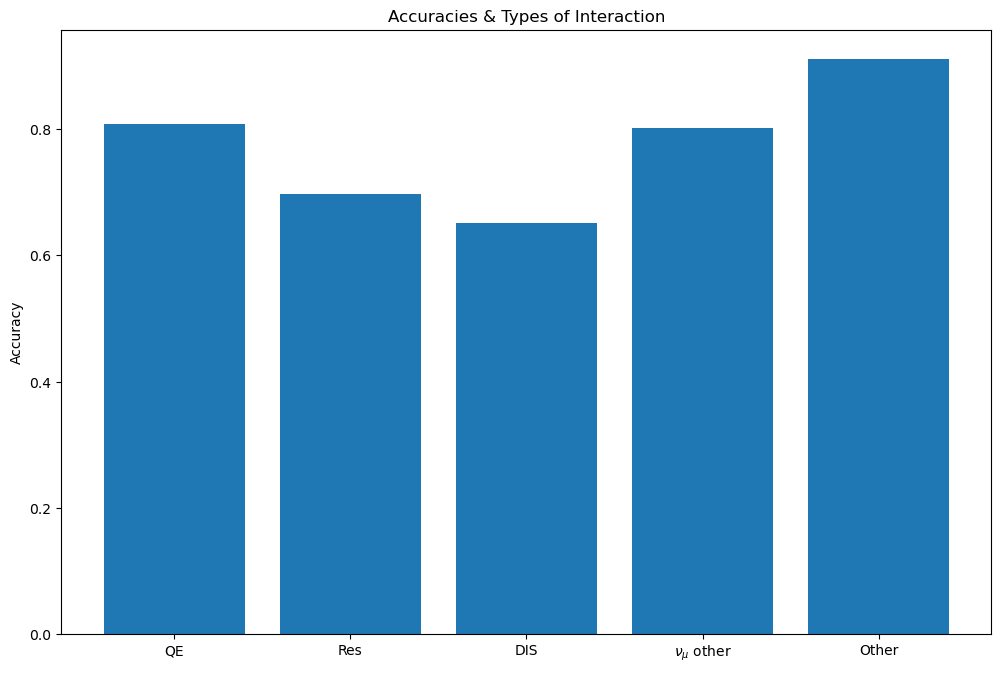

In [280]:
# define an array for plotting of event accuracies
event_accuracies = [event0_accuracy, event1_accuracy, event2_accuracy, event3_accuracy, event4_accuracy]

# plot accuracies on types of events
plt.figure(figsize=(12,8))
plt.title('Accuracies & Types of Interaction')
plt.ylabel('Accuracy')
plt.bar(event_names, event_accuracies)
plt.show()

QE events and '$\nu_{\mu}$ other' events are clearer than the more messier RES and DIS events, hence the model manages to predict them better. DIS events remain the messiest and hardest for the model to distinguish. Interestingly enough, it is the events with most representation in the data which the classifier learned to predict the worst. This probably means that these events really are more difficult to predict than other types of events, though it also could mean that for other, less frequent, events, the model simply didn't have large enough of a sample to have a lower accuracy.

# Extension 1: Training a Machine Learning Algorithm to Predict Neutrino Energies

This tasks differs importantly with the previous one in that the values which it must be predicted correctly are no longer binary 0s and 1s, but rather continuous energy values. 

Given that the problem is no longer one of binary classification, I dont use the evenly distributed dataset. This should help the model's accuracy as there are more training images in the uneven dataset. I define the training and testing datsets for the energies below.

In [27]:
# split nuenergies array into training and testing datasets using the split number
nuenergies_train = nuenergies[:split_num]
nuenergies_test = nuenergies[split_num:]

In [28]:
len(nuenergies_train), len(nuenergies_test)

(66989, 16748)

### Model for Predicting Energies

For this model I reused the architecture used for the second model in the binary classification task, though I have reduced its size significantly to speed up training. I removed all the regularisations because I want to see how accuracte the model can get, and not worry about overfitting too much. The relevant metric is a measure of how far off the actual values is the model's predictions, which is why I used the mean-absolute-error metric.

In [282]:
# Define the input shape for each image
input_shape = (100, 80, 1)  # Single image of size 100x80 pixels

# Define the xz plane input
x_input = layers.Input(shape=input_shape, name='xz_plane_input')
# Define the yz plane input
y_input = layers.Input(shape=input_shape, name='yz_plane_input')

# define xz plane network
x_conv2D = layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape)(x_input)
x_pool2D = layers.MaxPooling2D((2,2))(x_conv2D)
x_2nd_conv2D = layers.Conv2D(32, (3,3), activation='relu')(x_pool2D)  
x_2nd_pool2D = layers.MaxPooling2D((2,2))(x_2nd_conv2D)

# define yz plane network
y_conv2D = layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape)(y_input)
y_pool2D = layers.MaxPooling2D((2,2))(y_conv2D)
y_2nd_conv2D = layers.Conv2D(32, (3,3), activation='relu')(y_pool2D)  
y_2nd_pool2D = layers.MaxPooling2D((2,2))(y_2nd_conv2D)

# merge layers
merged_layer = layers.concatenate([x_2nd_pool2D, y_2nd_pool2D], axis=1)

# Joint convolutional & pooling layers
joint_conv2d = layers.Conv2D(64,(5,5), activation='relu', input_shape=input_shape)(merged_layer)
joint_pool2d = layers.MaxPooling2D((2,2))(joint_conv2d)

# Flatten the output for dense layers
flatten_layer = layers.Flatten()(joint_pool2d)

# Dense layers
dense_layer = layers.Dense(32, activation='relu')(flatten_layer)  
dense_2nd_layer = layers.Dense(16, activation='relu')(dense_layer)

# Output layer with linear activation
output_layer = layers.Dense(1, activation='linear')(dense_2nd_layer)

# Construct the model
energyModel = models.Model(inputs=[x_input, y_input], outputs=output_layer)

# Compile the model 
energyModel.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Display model summary
energyModel.summary()

Model: "model_27"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 xz_plane_input (InputLayer  [(None, 100, 80, 1)]         0         []                            
 )                                                                                                
                                                                                                  
 yz_plane_input (InputLayer  [(None, 100, 80, 1)]         0         []                            
 )                                                                                                
                                                                                                  
 conv2d_320 (Conv2D)         (None, 98, 78, 32)           320       ['xz_plane_input[0][0]']      
                                                                                           

In [283]:
# train model
energyModelHistory = energyModel.fit([x_train_images, y_train_images], nuenergies_train, epochs=15, batch_size=100,
                                    validation_split=0.2)

Epoch 1/15
536/536 [==============================] - 101s 186ms/step - loss: 94.4161 - mean_absolute_error: 7.2574 - val_loss: 85.4027 - val_mean_absolute_error: 6.8573
Epoch 2/15
536/536 [==============================] - 101s 188ms/step - loss: 86.9304 - mean_absolute_error: 6.9184 - val_loss: 80.4331 - val_mean_absolute_error: 6.6833
Epoch 3/15
536/536 [==============================] - 100s 187ms/step - loss: 81.6690 - mean_absolute_error: 6.5858 - val_loss: 77.0079 - val_mean_absolute_error: 6.4516
Epoch 4/15
536/536 [==============================] - 98s 182ms/step - loss: 79.5356 - mean_absolute_error: 6.4502 - val_loss: 79.9010 - val_mean_absolute_error: 6.8392
Epoch 5/15
536/536 [==============================] - 98s 183ms/step - loss: 77.6404 - mean_absolute_error: 6.3491 - val_loss: 76.2355 - val_mean_absolute_error: 6.5024
Epoch 6/15
536/536 [==============================] - 98s 182ms/step - loss: 75.9067 - mean_absolute_error: 6.2514 - val_loss: 75.1746 - val_mean_absolu

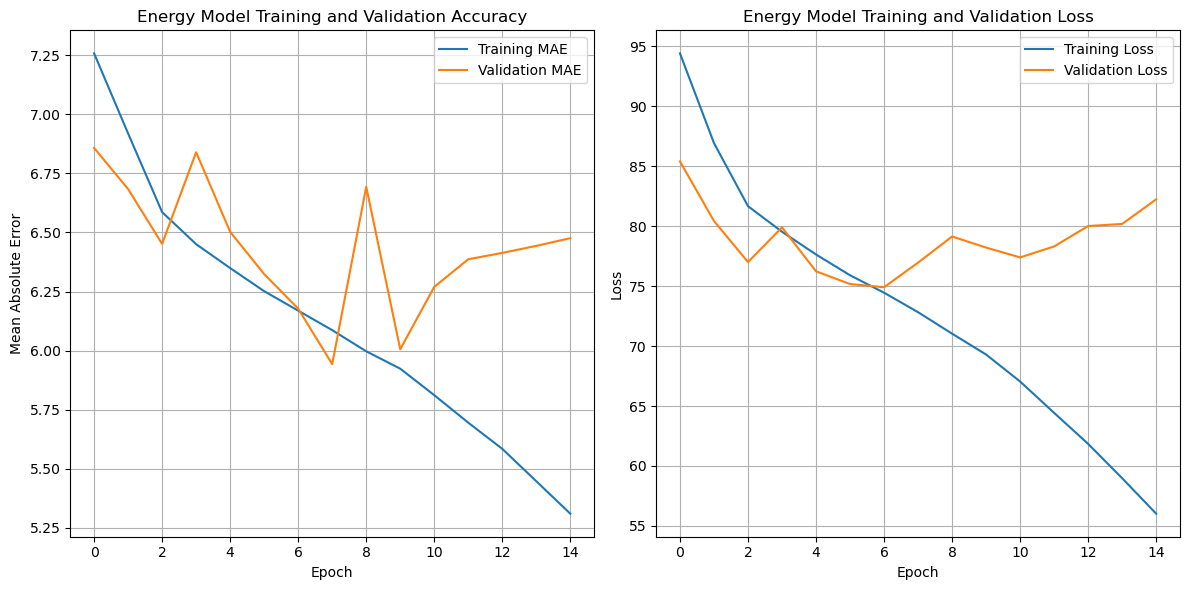

In [284]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for ax in axs:
    ax.grid(True)

# Plot training and validation MAE
axs[0].plot(energyModelHistory.history['mean_absolute_error'], label='Training MAE')
axs[0].plot(energyModelHistory.history['val_mean_absolute_error'], label='Validation MAE')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Mean Absolute Error')
axs[0].set_title('Energy Model Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(energyModelHistory.history['loss'], label='Training Loss')
axs[1].plot(energyModelHistory.history['val_loss'], label='Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Energy Model Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

The validation mean absolute error hovers around 6.5, meaning that on average the model's predictions deviate from actual energies by 6.5 GeV. If we look at the neutrino energy distributions at the beginning of the notebook we see that the vast majority of events lie in the 0-20 GeV range, where on the high end a deviation of 6.4 isn't terrible, but on the low ends is very unreliable. For higher energies however, this average deviation becomes less significant, though nonetheless, its size suggests that the model isn't very precise. 

In [285]:
# evaluating model
energiesModel_accuracy = energyModel.evaluate([x_test_images, y_test_images], nuenergies_test)

524/524 [==============================] - 8s 14ms/step - loss: 85.9182 - mean_absolute_error: 6.5971


In [286]:
# View model predictions
energyModel_predictions = energyModel.predict([x_test_images, y_test_images])

524/524 [==============================] - 8s 14ms/step


To visualise the model's predictive capabilities I plot below the distributions predicted by the model for different number of bins in histograms.

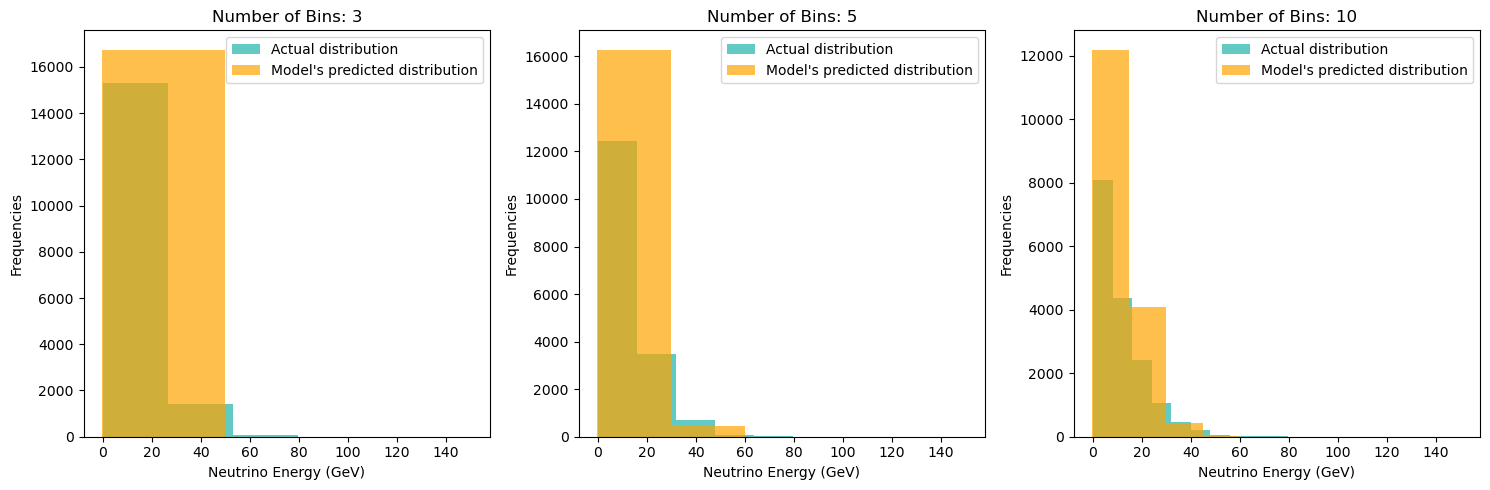

In [289]:
# Define the bins to be used for histogram
bins_arr = [3, 5, 10]

# Create subplots
fig, axs = plt.subplots(1, len(bins_arr), figsize=(15, 5))

# Iterate over each bin size
for i, bins in enumerate(bins_arr):
    # Plot the actual distribution
    axs[i].hist(nuenergies_test, bins=bins, alpha=0.7, label='Actual distribution', color='lightseagreen')
    # Plot the model's predicted distribution
    axs[i].hist(energyModel_predictions, bins=bins, alpha=0.7, label="Model's predicted distribution", color='orange')
    
    # Plot settings
    axs[i].set_title(f"Number of Bins: {bins}")
    axs[i].set_xlabel("Neutrino Energy (GeV)")
    axs[i].set_ylabel("Frequencies")
    axs[i].legend()

plt.tight_layout()
plt.show()

The model's predictions are shifted relative to the actual distribution. In every case they are overestimated. For larger energies the model's predictions are quite strongly understimated, though for 10 bins the model's distribution seems to map on more strongly to the actual distribution, probably due to the reduced estimates at lower energies.

Another method of visualising how well the model does is with plots of the cumulative probabilies and probability distributions (though this one provides pretty much the same information as the histogram plots). This is done below.

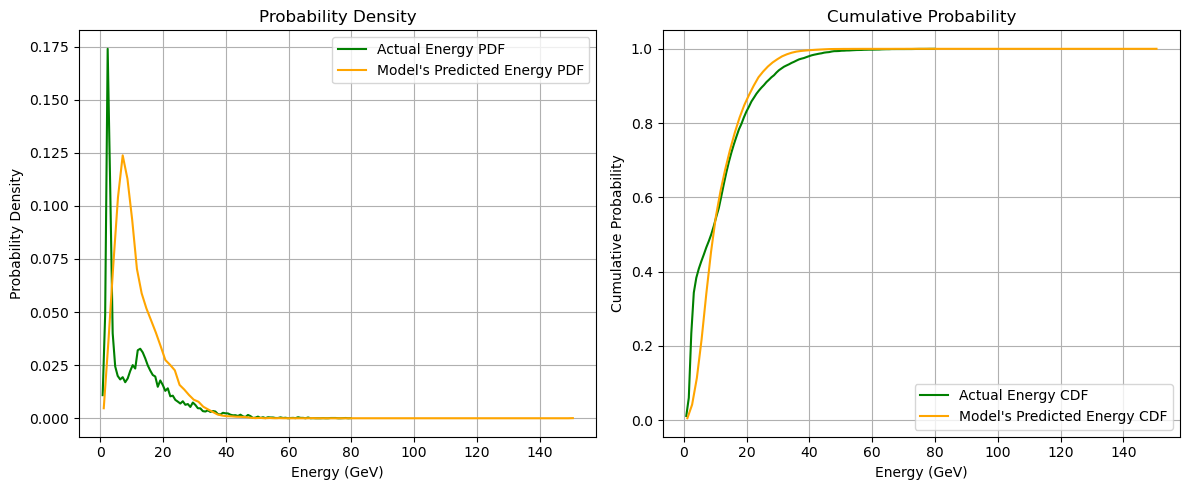

In [290]:
# Compute the actual histogram
actual_hist, actual_bins = np.histogram(nuenergies_test, bins=100, density=True)
actual_pdf = actual_hist / np.sum(actual_hist)
actual_cdf = np.cumsum(actual_pdf)

# Compute the predicted histogram
predicted_hist, predicted_bins = np.histogram(energyModel_predictions, bins=100, density=True)
predicted_pdf = predicted_hist / np.sum(predicted_hist)
predicted_cdf = np.cumsum(predicted_pdf)

# Plot the PDF
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(actual_bins[1:], actual_pdf, label='Actual Energy PDF', color='green')
plt.plot(predicted_bins[1:], predicted_pdf, label="Model's Predicted Energy PDF", color='orange')
plt.title('Probability Density')
plt.xlabel('Energy (GeV)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Plot the CPD
plt.subplot(1, 2, 2)
plt.plot(actual_bins[1:], actual_cdf, label='Actual Energy CDF', color='green')
plt.plot(predicted_bins[1:], predicted_cdf, label="Model's Predicted Energy CDF", color='orange')
plt.title('Cumulative Probability')
plt.xlabel('Energy (GeV)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

When plotting the probability density functions we see that the model struggles to fit to the actual distributions very rapid rise in the number of events at lower energies. Cumulatively the model seemingly reflects the nature of the distribution well, with similar proportions of events of higher (>30GeV) to lower energies. 

# Extension 2: Write a Machine Learning Algorithm to Determine the Interaction Mode

This is similarly, a categorisation problem like the first one, except here there are quite a few more categories. We're going to try to distinguish between different Res, DIS, QE muon-neutrino and electron neutrino events. Perhaps this could be used in tandem with the binary classifier as a larger classifier.

In [23]:
# display number of distinct interaction categories
distinct_interactions = set([tuple(interaction) for interaction in interactions])
print(f"There are {len(distinct_interactions)} distinct interactions. Their numerical identifiers are {distinct_interactions}")

There are 10 distinct interactions. Their numerical identifiers are {(6,), (2,), (15,), (5,), (4,), (1,), (7,), (0,), (13,), (3,)}


Because we don't know what 15 is I will simply refer to it as 'unknown'. Number 13 is an NC interaction, meaning: Neutral Current. Refer to the start of the notebook for the other interaction types.

Because the label numbers will refer to positions in a one hot vector, I will change all occurrences of 13 into a 8 label, and 15 into an 9.

In [24]:
# define new interactions array 
oneHot_interactions = interactions

# Loop through the array and replace 13 with 8 and 15 with 9
for inter in range(len(interactions)):
    if oneHot_interactions[inter] == 13:
        oneHot_interactions[inter] = 8
    elif oneHot_interactions[inter] == 15:
        oneHot_interactions[inter] = 9

# display oneHot interaction labels
set([tuple(oneHot_interactions) for oneHot_interactions in oneHot_interactions])

{(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,)}

We face the same problem of evening the dataset as we did in the first problem. Let us first investigate the frequency distribution of interations.

In [25]:
# display number of interactions of each type
np.sum(oneHot_interactions==0),np.sum(oneHot_interactions==1),np.sum(oneHot_interactions==2),np.sum(oneHot_interactions==3),np.sum(oneHot_interactions==4),np.sum(oneHot_interactions==5),np.sum(oneHot_interactions==6),np.sum(oneHot_interactions==7),np.sum(oneHot_interactions==8),np.sum(oneHot_interactions==9)

(10614, 16000, 45036, 2287, 83, 178, 751, 38, 8116, 634)

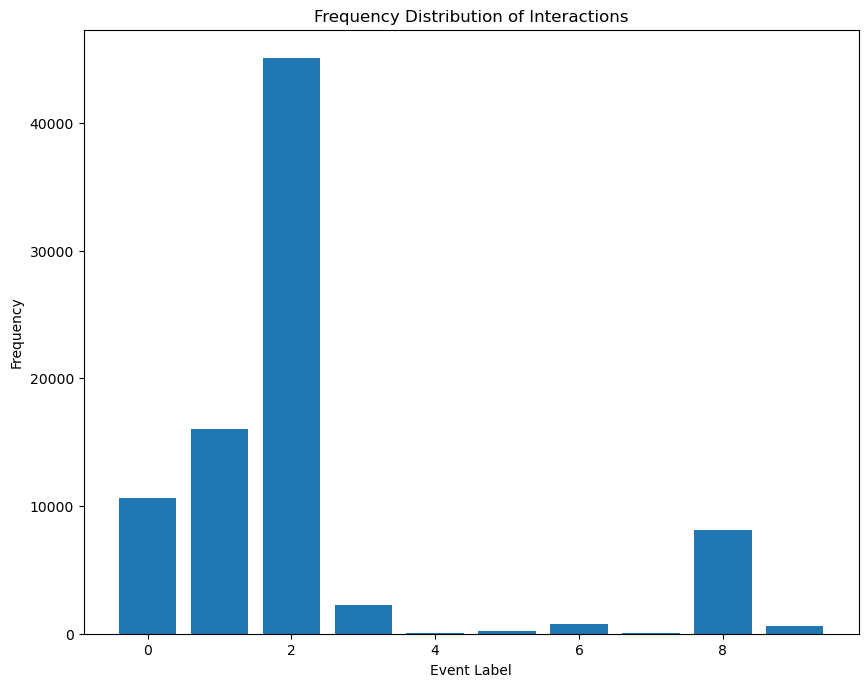

In [26]:
# plotting frequencies of interactions
plt.figure(figsize=(10,8))
plt.title("Frequency Distribution of Interactions")
plt.xlabel('Event Label')
plt.ylabel('Frequency')
plt.bar([0,1,2,3,4,5,6,7,8,9],
        [np.sum(oneHot_interactions==0),np.sum(oneHot_interactions==1),np.sum(oneHot_interactions==2),np.sum(oneHot_interactions==3),np.sum(oneHot_interactions==4),np.sum(oneHot_interactions==5),np.sum(oneHot_interactions==6),np.sum(oneHot_interactions==7),np.sum(oneHot_interactions==8),np.sum(oneHot_interactions==9)])
plt.show()

The bias in the dataset is clear. Interactions of type 4,5 and 7 are practially non-existent relative to the rest of interactions. I'm going to shift the objective to create a classifier aiming at distinguishing between QE,DIS,resonant (Res) interactions, independent of neutrino flavour. For this I have to refactor the dataset.

In [27]:
# calculate frequencies of DIS, QE, Resonant (Res) and other
DIS_occurrences_num = np.sum(np.isin(oneHot_interactions, [2,6]))
Res_occurrences_num = np.sum(np.isin(oneHot_interactions, [1,5]))
QE_occurrences_num = np.sum(np.isin(oneHot_interactions, [0,4]))
other_occurrences_num = np.sum(np.isin(oneHot_interactions, [3,7,8,9]))

# diplay frequency numbers
DIS_occurrences_num, Res_occurrences_num, QE_occurrences_num, other_occurrences_num

(45787, 16178, 10697, 11075)

There is a significant over representation of DIS events, so we have to once again even out the data. I'll redefine the oneHot_interactions array with 3 labels: *0-->DIS*, *1-->Res*, *2-->QE*. I'll have to filter out all images connected to labels 13,15,3 and 7.

In [28]:
# Find indices of numbers 13,15,3,7
indices_to_remove = np.where((interactions == 13) | (interactions == 15) | (interactions == 3) | (interactions == 7))[0]

# Create a boolean mask to select elements that are not 13,15,3,7
mask = np.ones(len(interactions), dtype=bool)
mask[indices_to_remove] = False

# Filtered arrays containing only the elements that are not 13,15,3,7
filtered_interactions = interactions[mask]
filtered_images = images[mask]

In [32]:
# Define the mapping dictionary (we set: 2 to QE, 1 to Res, 0 to DIS)
mapping_dict = {0: 2, 1: 1, 2: 0, 4: 2, 5: 1, 6: 0, 8: 2, 9: 1, 10: 0}

# defining new oneHot_interactions array (which serve as labels)
oneHot_interactions = np.vectorize(mapping_dict.get)(filtered_interactions)

In [33]:
# define cutoff index for train/test data split
index_split = int(0.8*len(filtered_images))

# split images into train/test datasets
filtered_train_images = filtered_images[:index_split]
filtered_test_images = filtered_images[index_split:]

# split labels into train and test
oneHot_train = oneHot_interactions[:index_split]
oneHot_test = oneHot_interactions[index_split:]

filtered_train_images.shape

(65129, 2, 100, 80)

In [34]:
def general_split_data_evenly(data, labels, num_classes):
    ''' Splits data into an even distribution of each class for a chosen number of classes.
    
    Args:
        data : Data array containing images 
        labels : Corresponding class labels for images

    Returns:
        even_data : Data array containing images of equal class distribution  
        even_labels : Corresponding class labels for images of equal class distribution
    
    '''
    # Find indices of each class
    class_indices = {}
    for i in range(num_classes):  # loop over labels range
        class_indices[i] = np.where(labels == i)[0]

    # Find the size of the smallest class
    min_size = min(len(class_indices[i]) for i in range(num_classes))

    # Randomly select equal number of samples from each class
    selected_indices = []
    for i in range(num_classes):
        selected_indices.extend(np.random.choice(class_indices[i], min_size, replace=False))

    # Shuffle the combined data and labels
    np.random.shuffle(selected_indices)
    
    return data[selected_indices], labels[selected_indices]

In [35]:
# create evenly split datasets
interTrain_images_even, oneHot_train_even = general_split_data_evenly(filtered_train_images, oneHot_train, 3)
interTest_images_even, oneHot_test_even = general_split_data_evenly(filtered_test_images, oneHot_test, 3)

In [36]:
# split even train/test arrays into images in the xz and yz planes
interTrain_images_evenX = interTrain_images_even[:,0]
interTrain_images_evenY = interTrain_images_even[:,1]
interTest_images_evenX = interTest_images_even[:,0]
interTest_images_evenY = interTest_images_even[:,1]

In [37]:
# one hot encode train and test labels 
inter_train_labels = utils.to_categorical(oneHot_train_even, num_classes=3)
inter_test_labels = utils.to_categorical(oneHot_test_even, num_classes=3)

In [39]:
len(interTrain_images_evenX), len(interTest_images_evenX)

(40449, 9987)

## Interactions Model

I try out the 4th model architecture for the binary classifier with categorical_cross_entropy as the loss and a softmax activation in the final layer due to the multi-class nature of the problem. 

In [194]:
# Define the input shape for each image
input_shape = (100, 80, 1)  # Single image of size 100x80 pixels

# Define the xz plane input
x_input = layers.Input(shape=input_shape, name='xz_plane_input')
# Define the yz plane input
y_input = layers.Input(shape=input_shape, name='yz_plane_input')

# define xz plane network
x_conv2D = layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape)(x_input)
x_pool2D = layers.MaxPooling2D((2,2))(x_conv2D)
x_2nd_conv2D = layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01))(x_pool2D)
x_2nd_pool2D = layers.MaxPooling2D((2,2))(x_2nd_conv2D)
x_inc = inception_module(x_2nd_pool2D,[128, 128, 32, 64]) # Apply Inception module
x_2nd_dropout = layers.Dropout(0.2)(x_inc)  # Adding dropout after the second pooling layer

# define yz plane network
y_conv2D = layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape)(y_input)
y_pool2D = layers.MaxPooling2D((2,2))(y_conv2D)
y_2nd_conv2D = layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01))(y_pool2D)
y_2nd_pool2D = layers.MaxPooling2D((2,2))(y_2nd_conv2D)
y_inc = inception_module(y_2nd_pool2D,[128, 128, 32, 64]) # Apply Inception module
y_2nd_dropout = layers.Dropout(0.2)(y_inc)  # Adding dropout after the second pooling layer

# merge layers
merged_layer = layers.concatenate([x_2nd_dropout, y_2nd_dropout], axis=1)

# Joint convolutional & pooling layers
joint_conv2d = layers.Conv2D(128,(5,5), activation='relu', input_shape=input_shape)(merged_layer)
joint_pool2d = layers.MaxPooling2D((2,2))(joint_conv2d)

# Flatten the output for dense layers
flatten_layer = layers.Flatten()(joint_pool2d)

# Dense layers
dense_layer = layers.Dense(64, activation='relu')(flatten_layer)
dense_2nd_layer = layers.Dense(32, activation='relu')(dense_layer)

# Output layer with softmax activation
output_layer = layers.Dense(3, activation='softmax')(dense_2nd_layer)

# Construct the model
interModel = models.Model(inputs=[x_input, y_input], outputs=output_layer)

# Compile the model 
interModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
interModel.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 xz_plane_input (InputLayer  [(None, 100, 80, 1)]         0         []                            
 )                                                                                                
                                                                                                  
 yz_plane_input (InputLayer  [(None, 100, 80, 1)]         0         []                            
 )                                                                                                
                                                                                                  
 conv2d_205 (Conv2D)         (None, 98, 78, 64)           640       ['xz_plane_input[0][0]']      
                                                                                           

 dense_42 (Dense)            (None, 64)                   1204288   ['flatten_15[0][0]']          
                                                                                                  
 dense_43 (Dense)            (None, 32)                   2080      ['dense_42[0][0]']            
                                                                                                  
 dense_44 (Dense)            (None, 3)                    99        ['dense_43[0][0]']            
                                                                                                  
Total params: 2800323 (10.68 MB)
Trainable params: 2800323 (10.68 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [196]:
# train model
interModel_history = interModel.fit([interTrain_images_evenX, interTrain_images_evenY], inter_train_labels, epochs=15, batch_size=100,
                           validation_split=0.2)

Epoch 1/15
204/204 [==============================] - 211s 1s/step - loss: 1.1991 - accuracy: 0.3871 - val_loss: 1.0485 - val_accuracy: 0.4359
Epoch 2/15
204/204 [==============================] - 212s 1s/step - loss: 1.0490 - accuracy: 0.4396 - val_loss: 1.0376 - val_accuracy: 0.4569
Epoch 3/15
204/204 [==============================] - 216s 1s/step - loss: 1.0400 - accuracy: 0.4515 - val_loss: 1.0394 - val_accuracy: 0.4534
Epoch 4/15
204/204 [==============================] - 213s 1s/step - loss: 1.0265 - accuracy: 0.4629 - val_loss: 1.0379 - val_accuracy: 0.4548
Epoch 5/15
204/204 [==============================] - 214s 1s/step - loss: 1.0192 - accuracy: 0.4653 - val_loss: 1.0293 - val_accuracy: 0.4646
Epoch 6/15
204/204 [==============================] - 213s 1s/step - loss: 1.0133 - accuracy: 0.4694 - val_loss: 1.0218 - val_accuracy: 0.4652
Epoch 7/15
204/204 [==============================] - 213s 1s/step - loss: 1.0051 - accuracy: 0.4751 - val_loss: 1.0264 - val_accuracy: 0.4644

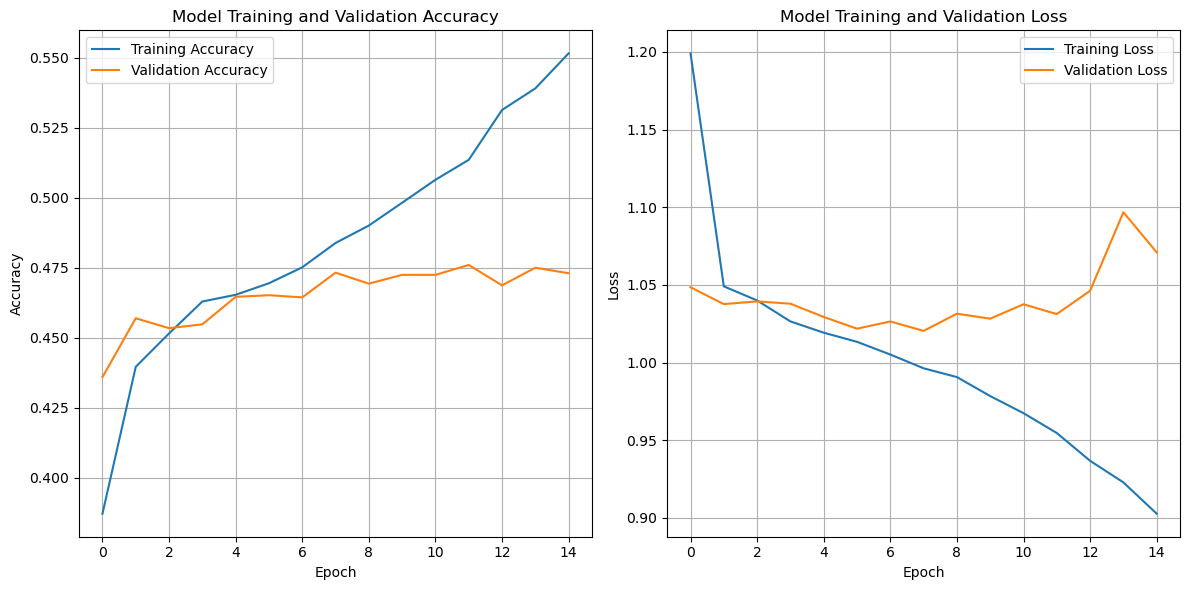

In [197]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
for ax in axs:
    ax.grid(True)

# Plot training and validation accuracy
axs[0].plot(interModel_history.history['accuracy'], label='Training Accuracy')
axs[0].plot(interModel_history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(interModel_history.history['loss'], label='Training Loss')
axs[1].plot(interModel_history.history['val_loss'], label='Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Model Training and Validation Loss')
axs[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

Well, being above 33%, at least the validation accuracy is better than a random classifier.

In [200]:
# evaluating model
interModel_accuracy = interModel.evaluate([interTest_images_evenX, interTest_images_evenY], inter_test_labels)

# View model predictions
interModel_predictions = interModel.predict([interTest_images_evenX, interTest_images_evenY])

207/207 [==============================] - 21s 100ms/step


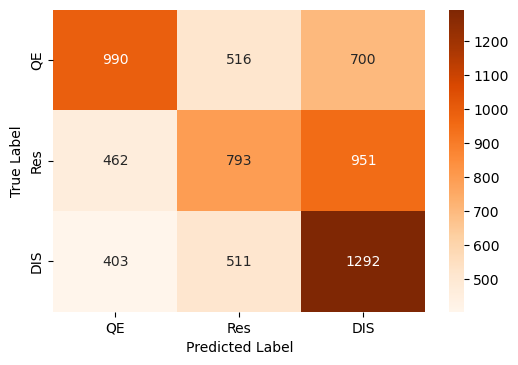

In [213]:
# Compute confusion matrix for each class
cm = confusion_matrix(inter_test_labels.argmax(axis=1), interModel_predictions.argmax(axis=1))
interaction_names = ['QE', 'Res', 'DIS']

# Plot confusion matrix 
sbrn.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=interaction_names, yticklabels=interaction_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

A positive is that the model does better than a random classifier. From the confusion matrix we get that following accuracies:

- DIS: 0.44.
- Res: 0.44.
- QE: 0.53.

QE accuracies are signficantly larger than the rest. This is similar to binary classifier where one of its higher accuracies was for QE interactions; they seem to be inherently easier for convolutional machine learning algorithms to feature-learn. 

# Conclusion 

(Copied from report)

Four models were trialled as binary-classifiers for simulated NOvA-like CC ν_µ events. It was found that a multi-view CNN using an inception module yielded the best results, with an accuracy of 0.80. Its performance was found to be highly dependent on event energies and interaction modes, with higher energies yielding greater accuracies and QE interactions (accuracy of 0.809) being significantly more accurately classified than DIS (0.650) or Res (0.698) interactions.  A similar model was used as a multi-class classifier for predicting interaction modes, resulting in an accuracy of 0.4646, with different accuracies for QE (0.53), DIS (0.44) and Res (0.44) interactions. A multi-view CNN was also trained to predict neutrino energies (MAE of 6.5971).